# I. Import Libraries

Let's start by reading the file to understand its structure and content. This will help in providing an overview of the data you mentioned. I'll read the file and display the first few rows to get a sense of the data.

The dataset contains information on the betting activity of individual customers for specific days. Here's an overview of the columns and their potential meanings:

- `DATE_DIM`: The date of the betting activity.
- `DAY_OF_WEEK`: The day of the week for the betting activity.
- `BET_ACCOUNT_NUM_HASH`: A unique identifier for each customer.
- `AGE`: The age of the customer.
- `AGE_BAND`: The age band or range the customer falls into.
- `GENDER`: The gender of the customer.
- `TENURE_IN_DAYS`: How long the customer has been with the service, in days.
- `RESIDENTIAL_STATE`: The state of residence of the customer.
- `FOB_RACING_TURNOVER`: Turnover from fixed odds betting on racing.
- `FOB_SPORT_TURNOVER`: Turnover from fixed odds betting on sports.
- `PARI_RACING_TURNOVER`: Turnover from pari-mutuel betting on racing.
- `PARI_SPORT_TURNOVER`: Turnover from pari-mutuel betting on sports.
- `TOTAL_TURNOVER`: The total betting turnover for the customer on that day.
- `DIVIDENDS_PAID`: The total dividends paid out to the customer on that day.
- `GROSS_MARGIN`: The gross margin from the customer's betting activity.
- `TICKETS`: The number of betting tickets or bets placed by the customer on that day.

The data seems well-structured for analysis, offering a comprehensive view of daily betting activities alongside demographic information about the customers. This dataset can be used to perform descriptive, diagnostic, predictive, and prescriptive analyses as outlined in your project guidelines, aiming to forecast future turnover based on historical wagering transactions and to optimize strategic decisions for WA TAB.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

# II. Import & Overview Dataset

## 2.1 Import Dataset

In [61]:
df_origin = pd.read_csv("TAB_Betting_Data.csv")
df = df_origin.copy()

## 2.2 Overview the Data

In [62]:
df.head()

DATE_DIM DAY_OF_WEEK  BET_ACCOUNT_NUM_HASH   AGE AGE_BAND GENDER  \
0  2021-01-01         Fri                 13154  67.0      65+      M   
1  2021-01-01         Fri                 18379  54.0    45-54      M   
2  2021-01-01         Fri                559232  63.0    55-64      M   
3  2021-01-01         Fri                698904  69.0      65+      M   
4  2021-01-01         Fri                762921  67.0      65+      M   

   TENURE_IN_DAYS RESIDENTIAL_STATE  FOB_RACING_TURNOVER  FOB_SPORT_TURNOVER  \
0           11846                WA                 37.0                 NaN   
1            1884                WA                 40.0                 NaN   
2            2866                WA                  NaN                 NaN   
3            2100                WA                  NaN                 NaN   
4            4766                WA                  NaN                 NaN   

   PARI_RACING_TURNOVER  PARI_SPORT_TURNOVER  TOTAL_TURNOVER  DIVIDENDS_PAID  \
0                1081.0                  NaN          1118.0          443.55   
1                   NaN                  NaN            40.0            0.00   
2                  12.0                  NaN            12.0            9.50   
3                1223.5                  NaN          1223.5          267.91   
4                  17.5                  NaN            17.5            0.00   

   GROSS_MARGIN  TICKETS  
0    271.254275      288  
1     40.000000        1  
2      2.041720        5  
3    245.117147       40  
4      3.504075        5

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12364101 entries, 0 to 12364100
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   DATE_DIM              object 
 1   DAY_OF_WEEK           object 
 2   BET_ACCOUNT_NUM_HASH  int64  
 3   AGE                   float64
 4   AGE_BAND              object 
 5   GENDER                object 
 6   TENURE_IN_DAYS        int64  
 7   RESIDENTIAL_STATE     object 
 8   FOB_RACING_TURNOVER   float64
 9   FOB_SPORT_TURNOVER    float64
 10  PARI_RACING_TURNOVER  float64
 11  PARI_SPORT_TURNOVER   float64
 12  TOTAL_TURNOVER        float64
 13  DIVIDENDS_PAID        float64
 14  GROSS_MARGIN          float64
 15  TICKETS               int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 1.5+ GB


In [64]:
df.describe()

BET_ACCOUNT_NUM_HASH           AGE  TENURE_IN_DAYS  \
count          1.236410e+07  1.236142e+07    1.236410e+07   
mean           2.144468e+09  5.314939e+01    3.437851e+03   
std            1.240403e+09  1.536221e+01    3.416204e+03   
min            1.315400e+04  1.800000e+01   -1.000000e+00   
25%            1.067720e+09  4.100000e+01    9.550000e+02   
50%            2.151297e+09  5.400000e+01    2.316000e+03   
75%            3.217306e+09  6.500000e+01    4.708000e+03   
max            4.294965e+09  1.040000e+02    2.132900e+04   

       FOB_RACING_TURNOVER  FOB_SPORT_TURNOVER  PARI_RACING_TURNOVER  \
count         8.576656e+06        1.779580e+06          8.527489e+06   
mean          1.235937e+02        1.278436e+02          1.063339e+02   
std           5.274644e+02        7.873640e+02          3.022158e+02   
min          -1.000000e+03       -5.500000e+02          0.000000e+00   
25%           1.000000e+01        1.000000e+01          1.000000e+01   
50%           3.000000e+01        2.300000e+01          3.000000e+01   
75%           9.000000e+01        7.200000e+01          9.575000e+01   
max           2.267710e+05        1.987243e+05          2.482320e+05   

       PARI_SPORT_TURNOVER  TOTAL_TURNOVER  DIVIDENDS_PAID  GROSS_MARGIN  \
count         15678.000000    1.236410e+07    1.236410e+07  1.236410e+07   
mean             37.800517    1.775206e+02    1.467335e+02  2.771342e+01   
std              91.525587    6.407664e+02    6.863462e+02  2.300061e+02   
min               0.000000   -1.000000e+03   -2.550000e+03 -1.123050e+05   
25%               4.000000    1.600000e+01    0.000000e+00  1.888508e+00   
50%              11.000000    5.000000e+01    1.435000e+01  1.099573e+01   
75%              32.000000    1.450000e+02    9.561000e+01  4.000000e+01   
max            2368.000000    2.648910e+05    4.137750e+05  8.088635e+04   

            TICKETS  
count  1.236410e+07  
mean   2.212268e+01  
std    6.451099e+01  
min    1.000000e+00  
25%    2.000000e+00  
50%    7.000000e+00  
75%    2.000000e+01  
max    1.911400e+04

In [65]:
# Find the range of dates in the DATE_DIM column
date_min = df['DATE_DIM'].min()
date_max = df['DATE_DIM'].max()

date_min, date_max


('2021-01-01', '2022-12-31')

- Data range in 2 years (2021,2022)

## 2.3 Checking & Dealing with Null Values

In [66]:
# Check for null values and duplicated rows
null_values = df.isnull().sum()
null_values

DATE_DIM                       0
DAY_OF_WEEK                    0
BET_ACCOUNT_NUM_HASH           0
AGE                         2676
AGE_BAND                       0
GENDER                         0
TENURE_IN_DAYS                 0
RESIDENTIAL_STATE              0
FOB_RACING_TURNOVER      3787445
FOB_SPORT_TURNOVER      10584521
PARI_RACING_TURNOVER     3836612
PARI_SPORT_TURNOVER     12348423
TOTAL_TURNOVER                 0
DIVIDENDS_PAID                 0
GROSS_MARGIN                   0
TICKETS                        0
dtype: int64

**Null Values appear in some column**
- AGE: Since age is an important demographic attribute, we might not want to discard rows with missing ages without further analysis. One approach could be to fill in the missing values with the median age, assuming age is typically a well-behaved attribute with a central tendency.
- Betting Turnover Columns (FOB_RACING_TURNOVER, FOB_SPORT_TURNOVER, PARI_RACING_TURNOVER, PARI_SPORT_TURNOVER): For turnover columns, null values likely indicate that the customer did not place bets in those categories for the day. It would be reasonable to fill these null values with 0, indicating no activity.

In [67]:
# Fill AGE null values with the median age
df['AGE'].fillna(df['AGE'].median(), inplace=True)

# Fill betting turnover columns' null values with 0
betting_turnover_columns = ['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']
df[betting_turnover_columns] = df[betting_turnover_columns].fillna(0)


In [68]:
# Re-check for null values to confirm changes
null_values_after = df.isnull().sum()
null_values_after

DATE_DIM                0
DAY_OF_WEEK             0
BET_ACCOUNT_NUM_HASH    0
AGE                     0
AGE_BAND                0
GENDER                  0
TENURE_IN_DAYS          0
RESIDENTIAL_STATE       0
FOB_RACING_TURNOVER     0
FOB_SPORT_TURNOVER      0
PARI_RACING_TURNOVER    0
PARI_SPORT_TURNOVER     0
TOTAL_TURNOVER          0
DIVIDENDS_PAID          0
GROSS_MARGIN            0
TICKETS                 0
dtype: int64

- No null left

## 2.4 Checking & Dealing with duplicated rows

In [69]:
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

- No duplicated rows founf in this dataset. Luckily!

## 2.5 Checking Unique Per Columns

In [70]:
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")


Unique values in 'DATE_DIM':
['2021-01-01' '2021-01-02' '2021-01-03' '2021-01-04' '2021-01-05'
 '2021-01-06' '2021-01-07' '2021-01-08' '2021-01-09' '2021-01-10'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15'
 '2021-01-16' '2021-01-17' '2021-01-18' '2021-01-19' '2021-01-20'
 '2021-01-21' '2021-01-22' '2021-01-23' '2021-01-24' '2021-01-25'
 '2021-01-26' '2021-01-27' '2021-01-28' '2021-01-29' '2021-01-30'
 '2021-01-31' '2021-02-01' '2021-02-02' '2021-02-03' '2021-02-04'
 '2021-02-05' '2021-02-06' '2021-02-07' '2021-02-08' '2021-02-09'
 '2021-02-10' '2021-02-11' '2021-02-12' '2021-02-13' '2021-02-14'
 '2021-02-15' '2021-02-16' '2021-02-17' '2021-02-18' '2021-02-19'
 '2021-02-20' '2021-02-21' '2021-02-22' '2021-02-23' '2021-02-24'
 '2021-02-25' '2021-02-26' '2021-02-27' '2021-02-28' '2021-03-01'
 '2021-03-02' '2021-03-03' '2021-03-04' '2021-03-05' '2021-03-06'
 '2021-03-07' '2021-03-08' '2021-03-09' '2021-03-10' '2021-03-11'
 '2021-03-12' '2021-03-13' '2021-03-14' '2021-0

In [71]:
# Mapping for converting days of the week from names to numbers as specified
day_of_week_mapping = {
    'Fri': 6, 'Sat': 7, 'Sun': 8,
    'Mon': 2, 'Tue': 3, 'Wed': 4, 'Thu': 5
}

# Apply the mapping to convert 'DAY_OF_WEEK' column
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map(day_of_week_mapping)

# Verify the conversion by checking the unique values in 'DAY_OF_WEEK' column
df.head()


DATE_DIM  DAY_OF_WEEK  BET_ACCOUNT_NUM_HASH   AGE AGE_BAND GENDER  \
0  2021-01-01            6                 13154  67.0      65+      M   
1  2021-01-01            6                 18379  54.0    45-54      M   
2  2021-01-01            6                559232  63.0    55-64      M   
3  2021-01-01            6                698904  69.0      65+      M   
4  2021-01-01            6                762921  67.0      65+      M   

   TENURE_IN_DAYS RESIDENTIAL_STATE  FOB_RACING_TURNOVER  FOB_SPORT_TURNOVER  \
0           11846                WA                 37.0                 0.0   
1            1884                WA                 40.0                 0.0   
2            2866                WA                  0.0                 0.0   
3            2100                WA                  0.0                 0.0   
4            4766                WA                  0.0                 0.0   

   PARI_RACING_TURNOVER  PARI_SPORT_TURNOVER  TOTAL_TURNOVER  DIVIDENDS_PAID  \
0                1081.0                  0.0          1118.0          443.55   
1                   0.0                  0.0            40.0            0.00   
2                  12.0                  0.0            12.0            9.50   
3                1223.5                  0.0          1223.5          267.91   
4                  17.5                  0.0            17.5            0.00   

   GROSS_MARGIN  TICKETS  
0    271.254275      288  
1     40.000000        1  
2      2.041720        5  
3    245.117147       40  
4      3.504075        5

## 2.6 Dealing with Negative

In [72]:
# List of specified columns to check for negative values
specified_columns = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]

# Counting the number of negative values in each specified column in the cleaned dataset
negative_value_counts_cleaned = {column: (df[column] < 0).sum() for column in specified_columns}

negative_value_counts_cleaned


{'FOB_RACING_TURNOVER': 168,
 'FOB_SPORT_TURNOVER': 107,
 'PARI_RACING_TURNOVER': 0,
 'PARI_SPORT_TURNOVER': 0,
 'TOTAL_TURNOVER': 199,
 'DIVIDENDS_PAID': 247,
 'GROSS_MARGIN': 1929139,
 'TICKETS': 0}

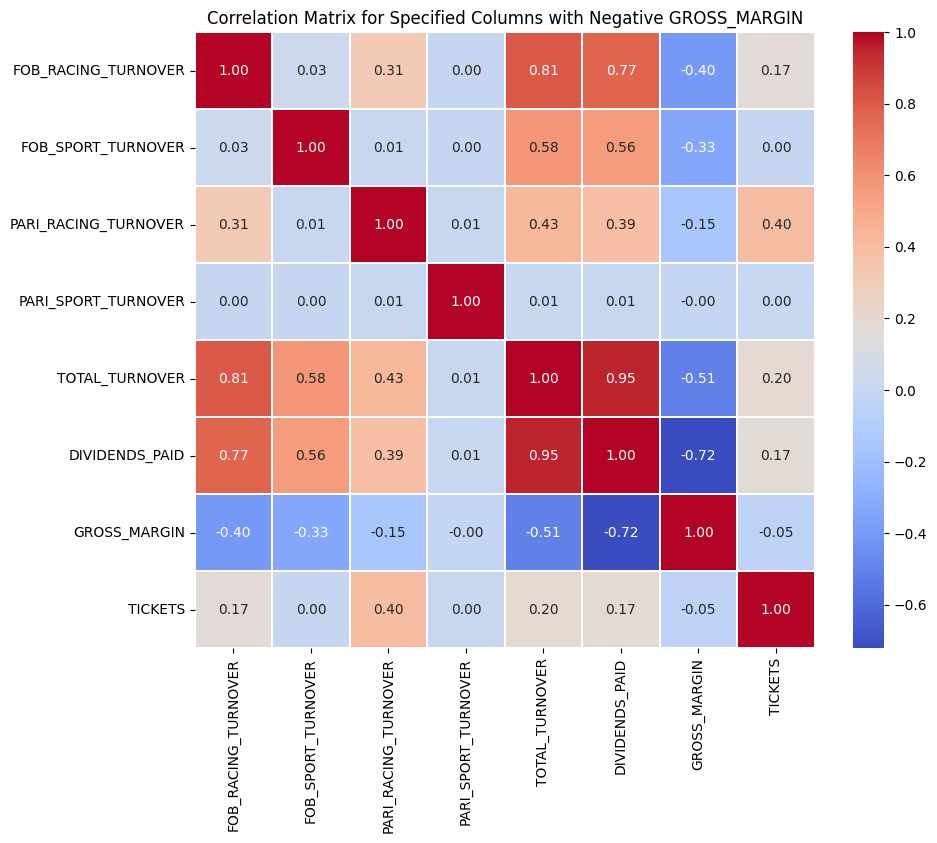

In [73]:
# Filter records with negative GROSS_MARGIN from the cleaned dataset
negative_gross_margin_records = df[df['GROSS_MARGIN'] < 0]

# Calculate the correlation among specified numerical features for records with negative GROSS_MARGIN
specified_columns_for_correlation = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]
negative_gross_margin_correlation = negative_gross_margin_records[specified_columns_for_correlation].corr()

# Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(negative_gross_margin_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
plt.title("Correlation Matrix for Specified Columns with Negative GROSS_MARGIN")
plt.show()


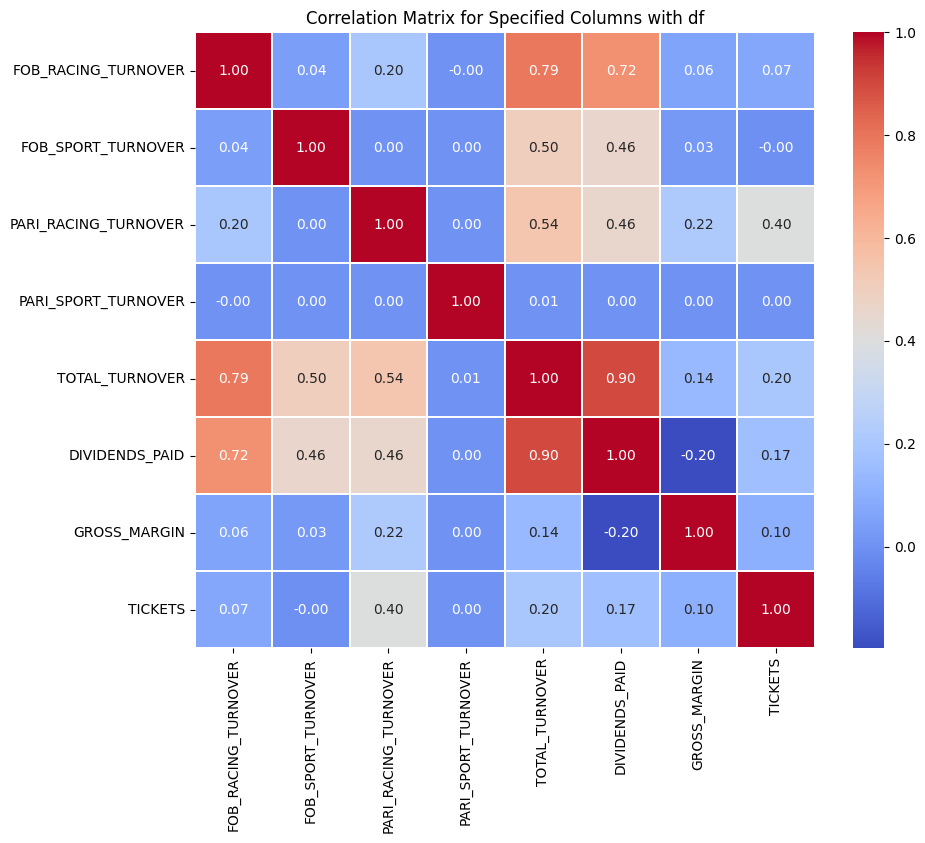

In [74]:


# Calculate the correlation among specified numerical features for records with negative GROSS_MARGIN
specified_columns_for_correlation = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]
df_corr = df[specified_columns_for_correlation].corr()

# Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
plt.title("Correlation Matrix for Specified Columns with df")
plt.show()


Trong biểu đồ ma trận tương quan mới này, chúng ta có thể thấy một số mối liên hệ khác biệt so với ma trận trước đó:

1. **`TOTAL_TURNOVER` và `DIVIDENDS_PAID`**: Sự tương quan mạnh (0.90) giữa tổng doanh thu và số tiền thưởng trả ra vẫn đứng vững, khẳng định rằng khi doanh thu từ cược tăng lên, số tiền thưởng trả cho người chơi cũng tăng theo.

2. **`FOB_RACING_TURNOVER` và `TOTAL_TURNOVER`**: Có một mối tương quan khá mạnh (0.79), cho thấy rằng doanh thu từ cược đua ngựa cố định là một phần quan trọng của tổng doanh thu cược.

3. **`GROSS_MARGIN`**: Không có mối liên hệ mạnh nào giữa `GROSS_MARGIN` và các cột doanh thu cược cụ thể (tất cả đều dưới 0.25), cho thấy rằng các yếu tố khác ngoài doanh thu cược có thể đang ảnh hưởng đến lợi nhuận ròng. Điều này có thể bao gồm cấu trúc chi phí, quản lý rủi ro, hoặc các yếu tố thị trường khác.

4. **`TICKETS`**: Không có mối liên hệ đáng kể giữa số lượng vé (`TICKETS`) và `GROSS_MARGIN` (0.10), gợi ý rằng việc tăng số lượng giao dịch không trực tiếp dẫn đến việc cải thiện lợi nhuận ròng.

5. **Mối liên hệ giữa `FOB_RACING_TURNOVER` và `DIVIDENDS_PAID`**: Mối tương quan dương (0.72) cho thấy rằng số tiền thưởng trả ra có thể bị ảnh hưởng đáng kể bởi doanh thu từ cược đua ngựa cố định.

Dựa trên những phát hiện này, WA TAB có thể cần xem xét việc điều chỉnh chiến lược định giá và quản lý rủi ro của mình, đặc biệt là trong các loại hình cược có tương quan cao với số tiền thưởng trả ra. Điều quan trọng là cần phải cân nhắc đến cả tỷ lệ cược và kỳ vọng của khách hàng để đảm bảo rằng lợi nhuận được tối ưu hóa.

In [75]:
# Extracting records where any of the specified columns have negative values
columns_with_potential_negatives = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER',
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN'
]

# Create a condition for any of the specified columns to have negative values
condition = (df[columns_with_potential_negatives] < 0).any(axis=1)

# Filter the records based on the condition
negative_value_records = df[condition]

negative_value_records


DATE_DIM  DAY_OF_WEEK  BET_ACCOUNT_NUM_HASH   AGE AGE_BAND GENDER  \
6         2021-01-01            6               1213538  46.0    45-54      M   
7         2021-01-01            6               1225565  76.0      65+      M   
15        2021-01-01            6               3099282  81.0      65+      M   
26        2021-01-01            6               5088323  61.0    55-64      U   
32        2021-01-01            6               5932568  30.0    25-34      M   
...              ...          ...                   ...   ...      ...    ...   
12364078  2022-12-31            7            4290850633  67.0      65+      U   
12364083  2022-12-31            7            4291637614  39.0    35-44      M   
12364090  2022-12-31            7            4292843937  30.0    25-34      M   
12364094  2022-12-31            7            4293602952  46.0    45-54      M   
12364097  2022-12-31            7            4294296954  30.0    25-34      U   

          TENURE_IN_DAYS RESIDENTIAL_STATE  FOB_RACING_TURNOVER  \
6                    714                WA                 56.0   
7                  10686                WA                 10.0   
15                  5182                WA                 35.0   
26                   894                WA                 55.0   
32                  2553                WA                 50.0   
...                  ...               ...                  ...   
12364078            1400               OTH                 14.0   
12364083            6107                WA                605.0   
12364090            1667                WA                106.0   
12364094            3816                WA                342.0   
12364097              14               OTH                450.0   

          FOB_SPORT_TURNOVER  PARI_RACING_TURNOVER  PARI_SPORT_TURNOVER  \
6                       68.0                  10.0                  0.0   
7                        0.0                   0.0                  0.0   
15                       0.0                 119.4                  0.0   
26                       0.0                   0.0                  0.0   
32                       0.0                   0.0                  0.0   
...                      ...                   ...                  ...   
12364078                 0.0                   0.0                  0.0   
12364083                 0.0                 117.5                  0.0   
12364090                 0.0                   0.0                  0.0   
12364094                 0.0                 122.5                  0.0   
12364097                 0.0                   0.0                  0.0   

          TOTAL_TURNOVER  DIVIDENDS_PAID  GROSS_MARGIN  TICKETS  
6                  134.0          149.00    -23.279175       12  
7                   10.0           35.00    -25.000000        1  
15                 154.4          279.31    -98.807931       18  
26                  55.0           84.00    -29.000000        2  
32                  50.0           60.00    -10.000000        1  
...                  ...             ...           ...      ...  
12364078            14.0           20.00     -6.000000        7  
12364083           722.5          780.10    -35.704346       77  
12364090           106.0          132.00    -26.000000        9  
12364094           464.5          486.15    -58.899433       34  
12364097           450.0          475.00    -25.000000        9  

[1929430 rows x 16 columns]

- Nhận xét chung của mấy cái giá trị âm này là giá trị trung bình không lớn, độ lệch của các giá trị cũng cao nữa. Chúng ta có nhiều cách để giải quyết
    - Loại bỏ: Loại bỏ hoàn toàn thì ít nhiều sẽ ảnh hưởng ít đến kết quả cuối. Và nó cũng chỉ chiếm số ít cọ thể 1xx trong 12tr dòng. 
    - Thay đổi: 
        - Nếu bạn quyết định xử lý các giá trị âm trong cột `FOB_SPORT_TURNOVER` thay vì loại bỏ chúng hoàn toàn, có một số phương pháp bạn có thể xem xét:

        ### 1. Thiết Lập Lại Giá Trị Bằng 0
        Giả định rằng các giá trị âm không phản ánh chính xác hoạt động cược và có thể được xem là không có hoạt động, bạn có thể thiết lập lại chúng thành 0.

        ```python
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = 0
        ```

        ### 2. Chuyển Đổi Sang Giá Trị Tuyệt Đối
        Nếu giả định rằng giá trị tuyệt đối của các số liệu âm có ý nghĩa trong một bối cảnh nào đó (ví dụ, biểu thị giá trị hoàn tiền), bạn có thể chuyển đổi chúng sang giá trị tuyệt đối.

        ```python
        data['FOB_SPORT_TURNOVER'] = data['FOB_SPORT_TURNOVER'].abs()
        ```

        ### 3. Sử Dụng Giá Trị Trung Bình hoặc Trung Vị
        Nếu giá trị âm được coi là ngoại lệ, bạn có thể thay thế chúng bằng giá trị trung bình hoặc trung vị của cột. Điều này giúp giữ dữ liệu ổn định mà không bị ảnh hưởng bởi ngoại lệ.

        ```python
        mean_value = data['FOB_SPORT_TURNOVER'][data['FOB_SPORT_TURNOVER'] >= 0].mean()
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = mean_value
        ```

        hoặc

        ```python
        median_value = data['FOB_SPORT_TURNOVER'][data['FOB_SPORT_TURNOVER'] >= 0].median()
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = median_value
        ```
---------------------------
- Dựa vào cá nhân, cảm nhận và kinh nghiệm thì mình sẽ loại bỏ hoàn toàn, và coi đây là các giá trị ngoại lai.

In [76]:
shape_before = df.shape

# Removing rows with negative values in FOB_SPORT_TURNOVER
condition = (
    (df['FOB_SPORT_TURNOVER'] >= 0) &
    (df['FOB_RACING_TURNOVER'] >= 0) &
    (df['PARI_RACING_TURNOVER'] >= 0) &
    (df['PARI_SPORT_TURNOVER'] >= 0) &
    (df['TOTAL_TURNOVER'] >= 0) &
    (df['DIVIDENDS_PAID'] >= 0)
)

df = df[condition]
# Check the shape of the data before and after removal to confirm the change
shape_after = df.shape

shape_before, shape_after



((12364101, 16), (12363655, 16))

In [77]:
rows_removed = shape_before[0]-shape_after[0]
rows_removed

446

## 2.7 Dealing with Time Features

In [78]:
# Convert DATE_DIM to datetime format
df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'])
# Tạo cột 'Week' và 'Month'
df['Week'] = df['DATE_DIM'].dt.isocalendar().week
df['Month'] = df['DATE_DIM'].dt.month
df['Year'] = df['DATE_DIM'].dt.year
# Convert DATE_DIM to datetime format
df['DATE_DIM'] = df['DATE_DIM'].dt.date
# Check the conversion by displaying the dtype of DATE_DIM
df['DATE_DIM'].dtype

df.head()

DATE_DIM  DAY_OF_WEEK  BET_ACCOUNT_NUM_HASH   AGE AGE_BAND GENDER  \
0  2021-01-01            6                 13154  67.0      65+      M   
1  2021-01-01            6                 18379  54.0    45-54      M   
2  2021-01-01            6                559232  63.0    55-64      M   
3  2021-01-01            6                698904  69.0      65+      M   
4  2021-01-01            6                762921  67.0      65+      M   

   TENURE_IN_DAYS RESIDENTIAL_STATE  FOB_RACING_TURNOVER  FOB_SPORT_TURNOVER  \
0           11846                WA                 37.0                 0.0   
1            1884                WA                 40.0                 0.0   
2            2866                WA                  0.0                 0.0   
3            2100                WA                  0.0                 0.0   
4            4766                WA                  0.0                 0.0   

   PARI_RACING_TURNOVER  PARI_SPORT_TURNOVER  TOTAL_TURNOVER  DIVIDENDS_PAID  \
0                1081.0                  0.0          1118.0          443.55   
1                   0.0                  0.0            40.0            0.00   
2                  12.0                  0.0            12.0            9.50   
3                1223.5                  0.0          1223.5          267.91   
4                  17.5                  0.0            17.5            0.00   

   GROSS_MARGIN  TICKETS  Week  Month  Year  
0    271.254275      288    53      1  2021  
1     40.000000        1    53      1  2021  
2      2.041720        5    53      1  2021  
3    245.117147       40    53      1  2021  
4      3.504075        5    53      1  2021

# VI. FORECASTING

# FORECASTING TREND

## 1. TOTAL TURNOVER TREND

In [79]:
df.head()

DATE_DIM  DAY_OF_WEEK  BET_ACCOUNT_NUM_HASH   AGE AGE_BAND GENDER  \
0  2021-01-01            6                 13154  67.0      65+      M   
1  2021-01-01            6                 18379  54.0    45-54      M   
2  2021-01-01            6                559232  63.0    55-64      M   
3  2021-01-01            6                698904  69.0      65+      M   
4  2021-01-01            6                762921  67.0      65+      M   

   TENURE_IN_DAYS RESIDENTIAL_STATE  FOB_RACING_TURNOVER  FOB_SPORT_TURNOVER  \
0           11846                WA                 37.0                 0.0   
1            1884                WA                 40.0                 0.0   
2            2866                WA                  0.0                 0.0   
3            2100                WA                  0.0                 0.0   
4            4766                WA                  0.0                 0.0   

   PARI_RACING_TURNOVER  PARI_SPORT_TURNOVER  TOTAL_TURNOVER  DIVIDENDS_PAID  \
0                1081.0                  0.0          1118.0          443.55   
1                   0.0                  0.0            40.0            0.00   
2                  12.0                  0.0            12.0            9.50   
3                1223.5                  0.0          1223.5          267.91   
4                  17.5                  0.0            17.5            0.00   

   GROSS_MARGIN  TICKETS  Week  Month  Year  
0    271.254275      288    53      1  2021  
1     40.000000        1    53      1  2021  
2      2.041720        5    53      1  2021  
3    245.117147       40    53      1  2021  
4      3.504075        5    53      1  2021

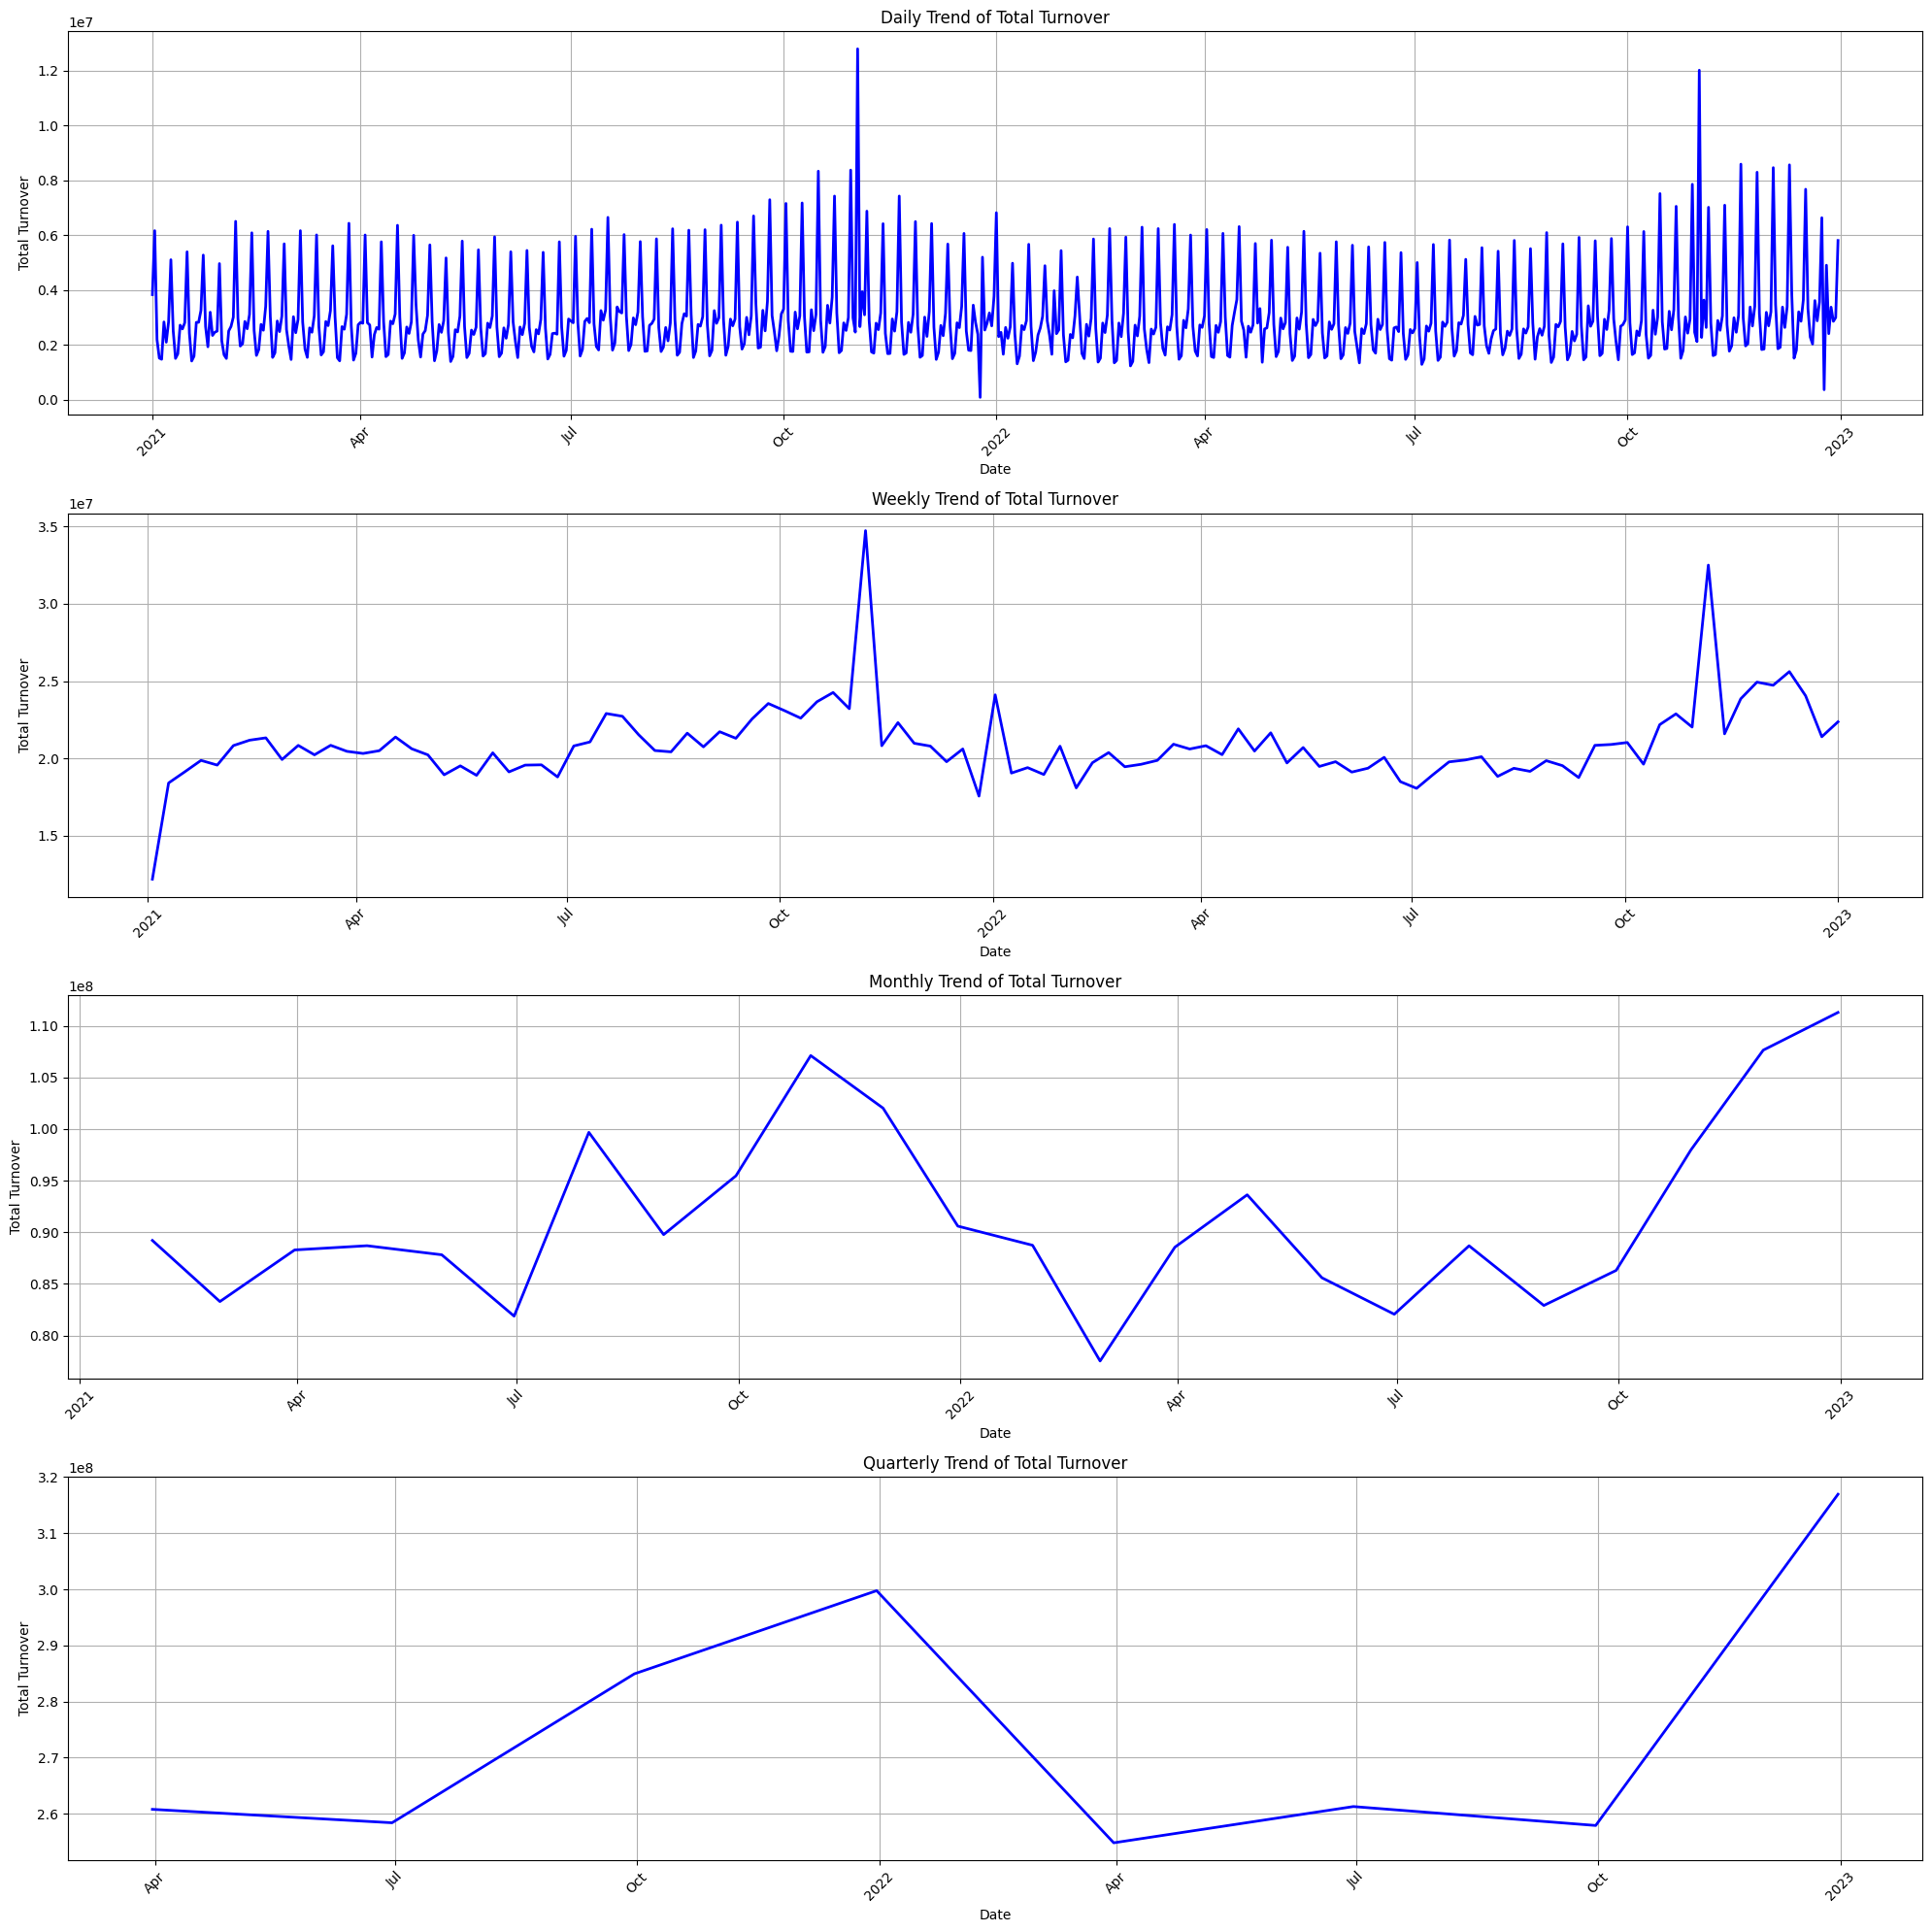

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'DATE_DIM' to datetime if it's not already
df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'])

# Set 'DATE_DIM' as the index
df.set_index('DATE_DIM', inplace=True)

# Aggregate turnover by day
df_daily = df.groupby(pd.Grouper(freq='D'))['TOTAL_TURNOVER'].sum()
df_weekly = df.groupby(pd.Grouper(freq='W'))['TOTAL_TURNOVER'].sum()
df_monthly = df.groupby(pd.Grouper(freq='M'))['TOTAL_TURNOVER'].sum()
df_quarterly = df.groupby(pd.Grouper(freq='Q'))['TOTAL_TURNOVER'].sum()

# Plotting the trends
fig, axes = plt.subplots(4, 1, figsize=(20, 20))

# Daily trend
axes[0].plot(df_daily.index, df_daily, marker='', color='blue', linewidth=2)
axes[0].set_title('Daily Trend of Total Turnover')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Turnover')

# Weekly trend
axes[1].plot(df_weekly.index, df_weekly, marker='', color='blue', linewidth=2)
axes[1].set_title('Weekly Trend of Total Turnover')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Turnover')

# Monthly trend
axes[2].plot(df_monthly.index, df_monthly, marker='', color='blue', linewidth=2)
axes[2].set_title('Monthly Trend of Total Turnover')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Total Turnover')

# Quarterly trend
axes[3].plot(df_quarterly.index, df_quarterly, marker='', color='blue', linewidth=2)
axes[3].set_title('Quarterly Trend of Total Turnover')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Total Turnover')

# Formatting the plots
for ax in axes:
    ax.grid(True)
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [193]:
df_trend = df.groupby('DATE_DIM')['TOTAL_TURNOVER'].sum().reset_index()

# Perform ADF test on the 'TOTAL_TURNOVER' column of df_daily_trend
adf_result_total_turnover = adfuller(df_trend['TOTAL_TURNOVER'], autolag='AIC')

# Convert the result to a DataFrame for a cleaner presentation
adf_result_df = pd.DataFrame({
    'Metric': ['ADF Statistic', 'p-value', '1% Critical Value', '5% Critical Value', '10% Critical Value'],
    'Value': [
        adf_result_total_turnover[0],
        adf_result_total_turnover[1],
        adf_result_total_turnover[4]['1%'],
        adf_result_total_turnover[4]['5%'],
        adf_result_total_turnover[4]['10%']
    ]
})

adf_result_df

Metric     Value
0       ADF Statistic -2.758679
1             p-value  0.064423
2   1% Critical Value -3.439607
3   5% Critical Value -2.865625
4  10% Critical Value -2.568945

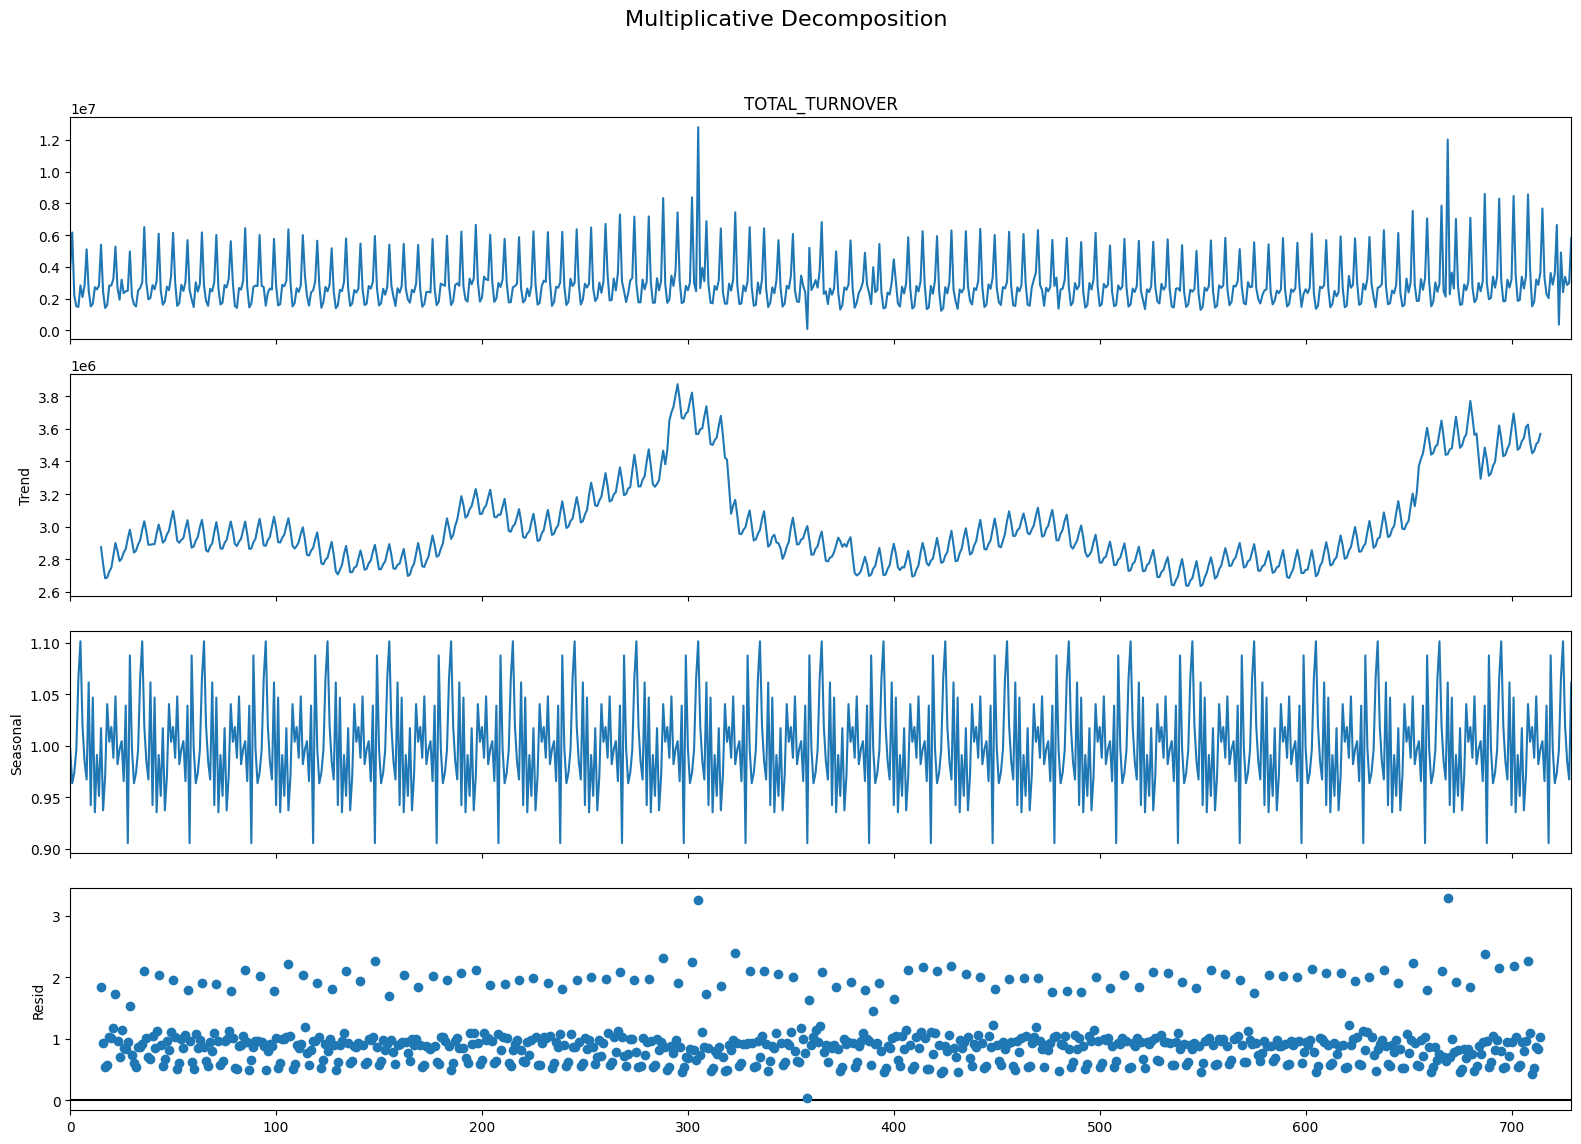

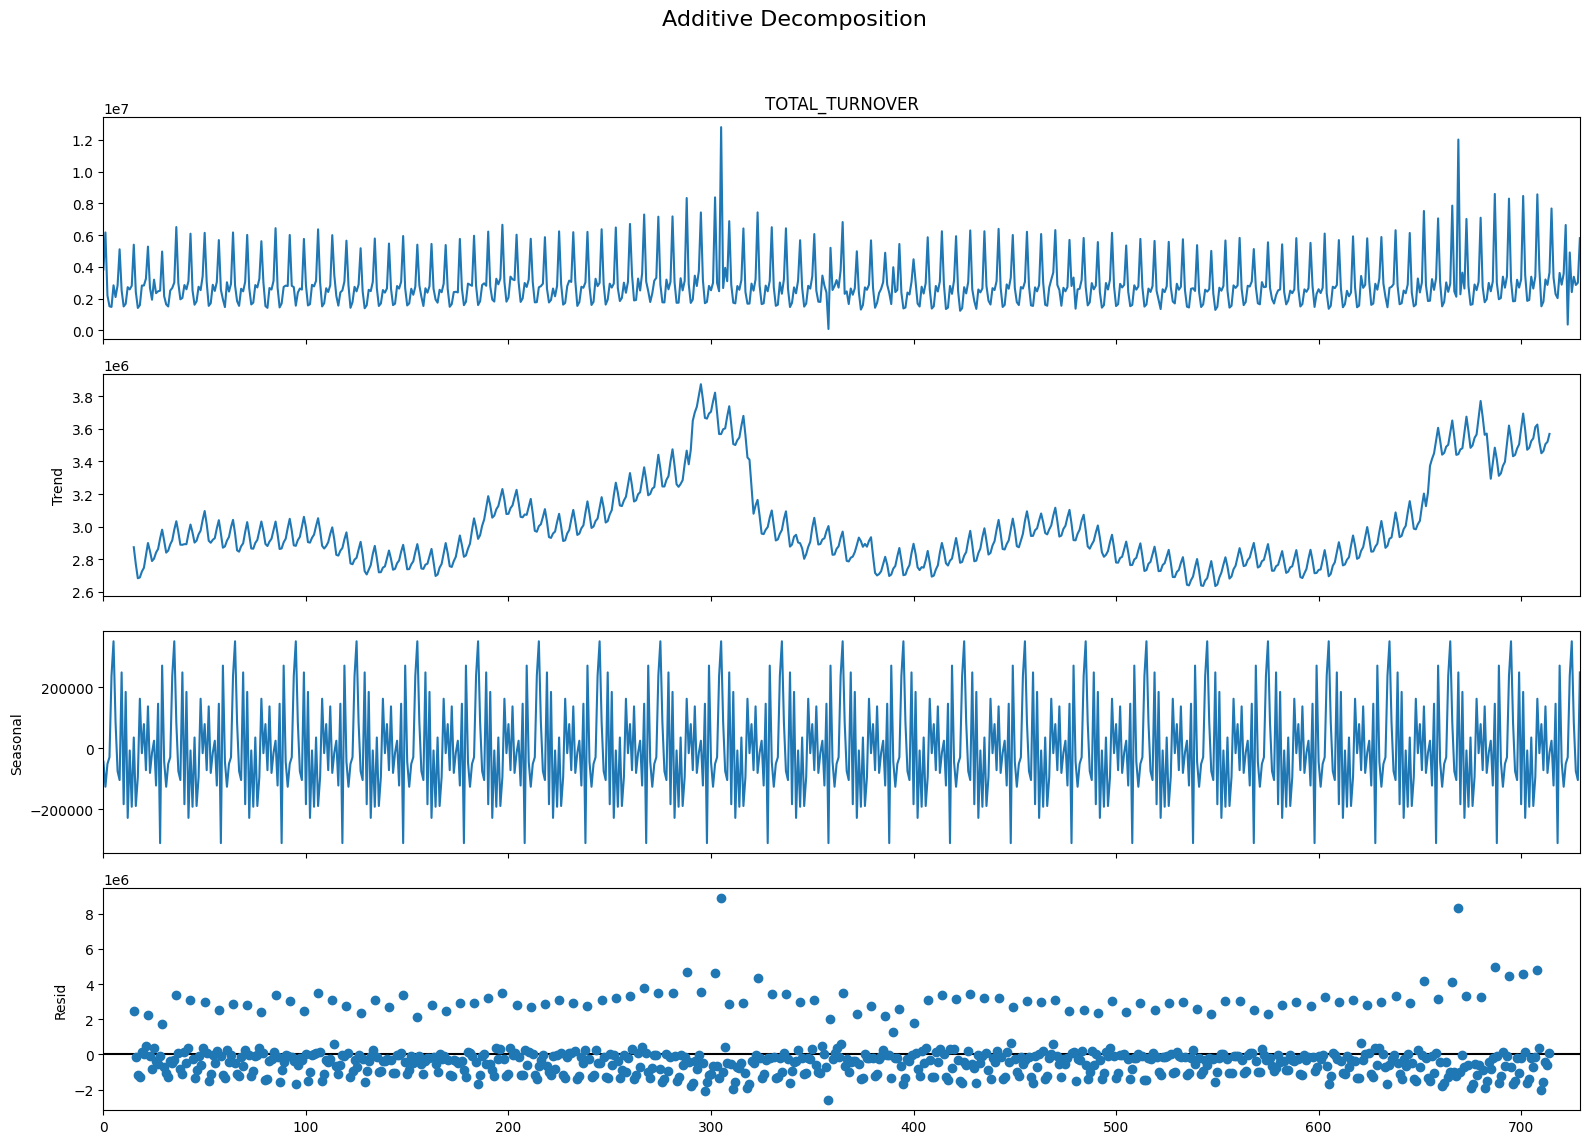

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df_daily_trend = df.groupby('DATE_DIM')['TOTAL_TURNOVER'].sum().reset_index()

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_daily_trend['TOTAL_TURNOVER'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_daily_trend['TOTAL_TURNOVER'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

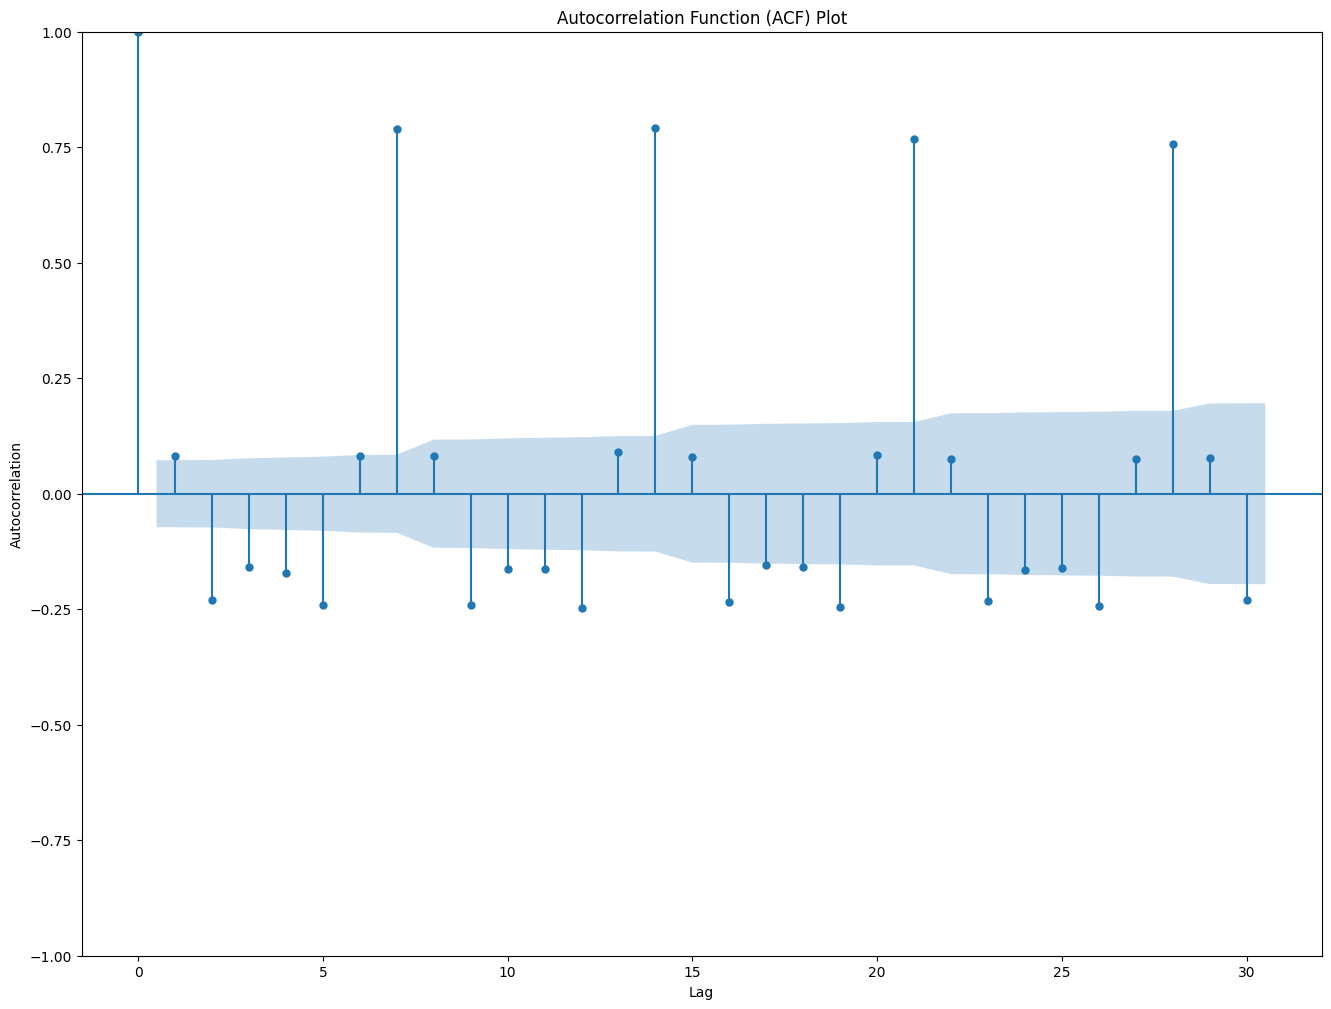

In [84]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Aggregate turnover by date
df_daily_trend = df.groupby('DATE_DIM')['TOTAL_TURNOVER'].sum().reset_index()
# Lấy chuỗi dữ liệu 'TOTAL_TURNOVER'
data = df_daily_trend['TOTAL_TURNOVER']

# Vẽ ACF plot để kiểm tra tính seasonal
plot_acf(data, lags=30)  # Thay đổi lags tùy thuộc vào độ dài chu kỳ mong muốn
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [85]:
data = df.groupby('DATE_DIM')['TOTAL_TURNOVER'].sum().reset_index()

In [86]:
data['DATE_DIM'] = pd.to_datetime(data['DATE_DIM'])
data.set_index('DATE_DIM', inplace=True)
data


TOTAL_TURNOVER
DATE_DIM                  
2021-01-01      3835763.01
2021-01-02      6165935.03
2021-01-03      2198013.19
2021-01-04      1523612.67
2021-01-05      1480832.82
...                    ...
2022-12-27      2413850.20
2022-12-28      3379823.57
2022-12-29      2862803.99
2022-12-30      3000204.42
2022-12-31      5807930.20

[730 rows x 1 columns]

In [88]:
import pmdarima as pm

In [141]:

smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=23159.126, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=22938.338, Time=0.56 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=23157.240, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=23154.436, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=22839.674, Time=3.58 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.65 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=22840.825, Time=10.20 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=22735.425, Time=4.80 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=22856.786, Time=0.59 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.27 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.82 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  730
Model:             SARIMAX(5, 0, 3)x(2, 1, [1], 12)   Log Likelihood              -11071.201
Date:                              Mon, 01 Apr 2024   AIC                          22168.402
Time:                                      02:00:25   BIC                          22227.897
Sample:                                  01-01-2021   HQIC                         22191.373
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9944.4423   3.33e+04      0.298      0.766   -5.54e+04    7.53e+04
ar.L1          0.0382      0.040      0.949      0.343      -0.041       0.117
ar.L2         -0.8125      0.032    -25.781      0.000      -0.874      -0.751
ar.L3         -0.2752      0.047     -5.817      0.000      -0.368      -0.182
ar.L4         -0.3496      0.030    -11.703      0.000      -0.408      -0.291
ar.L5         -0.7338      0.027    -26.789      0.000      -0.787      -0.680
ma.L1          0.0574      0.037      1.554      0.120      -0.015       0.130
ma.L2          0.8329      0.021     38.982      0.000       0.791       0.875
ma.L3         -0.1501      0.039     -3.843      0.000      -0.227      -0.074
ar.S.L12       0.3337      0.086      3.884      0.000       0.165       0.502
ar.S.L24      -0.1329      0.049     -2.740      0.006      -0.228      -0.038
ma.S.L12      -0.7151      0.079     -9.041      0.000      -0.870      -0.560
sigma2        1.6e+12      0.005   3.34e+14      0.000     1.6e+12     1.6e+12
===================================================================================
Ljung-Box (L1) (Q):                   2.53   Jarque-Bera (JB):              8288.99
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               2.50   Skew:                             1.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.97e+36. Standard errors may be unstable.
"""

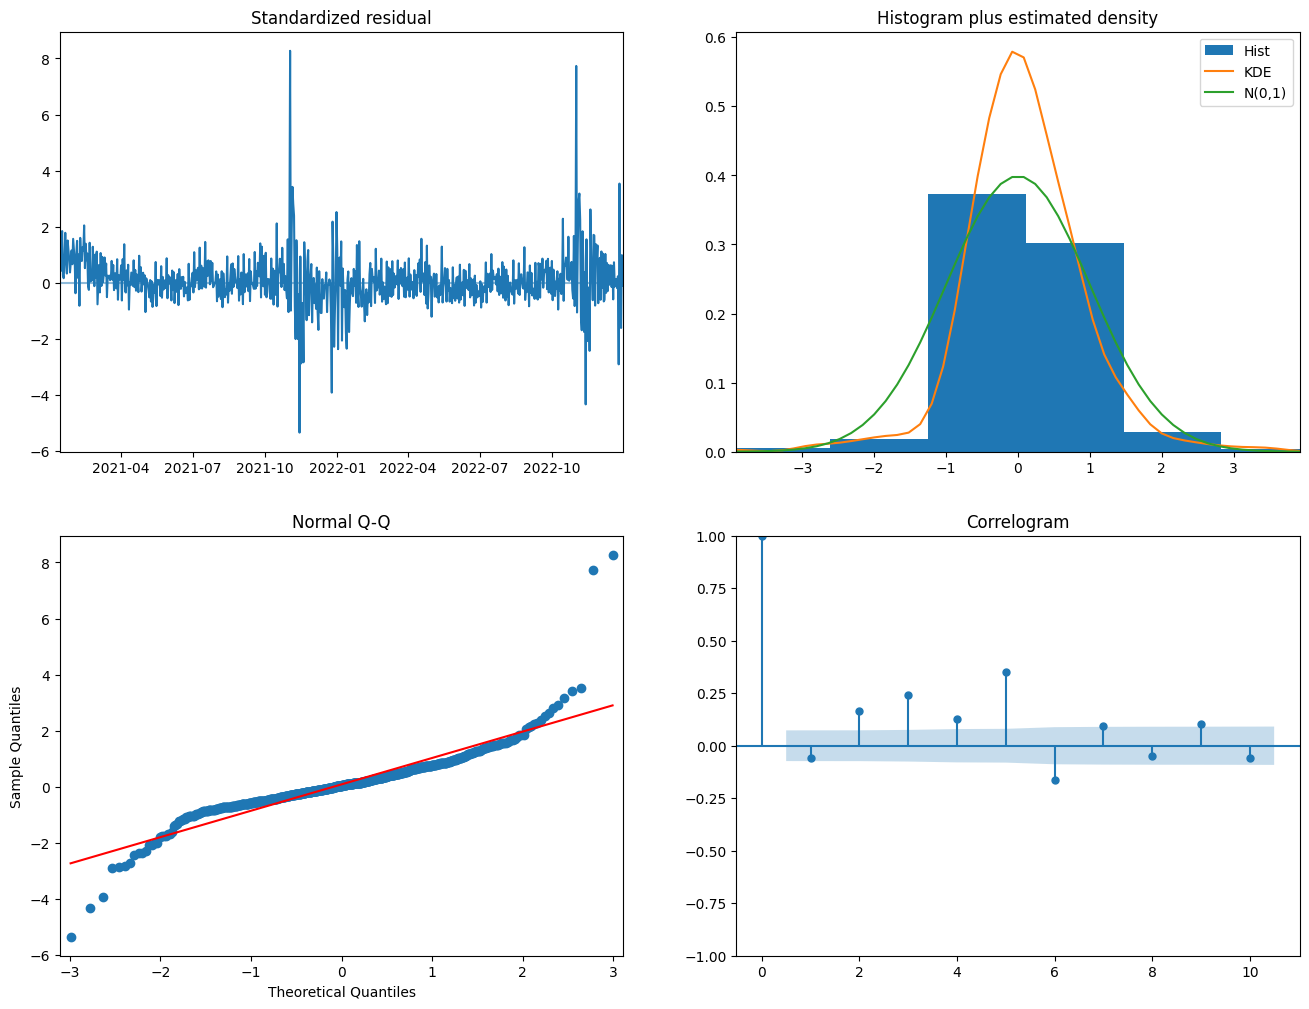

In [142]:
smodel.plot_diagnostics()
plt.show()

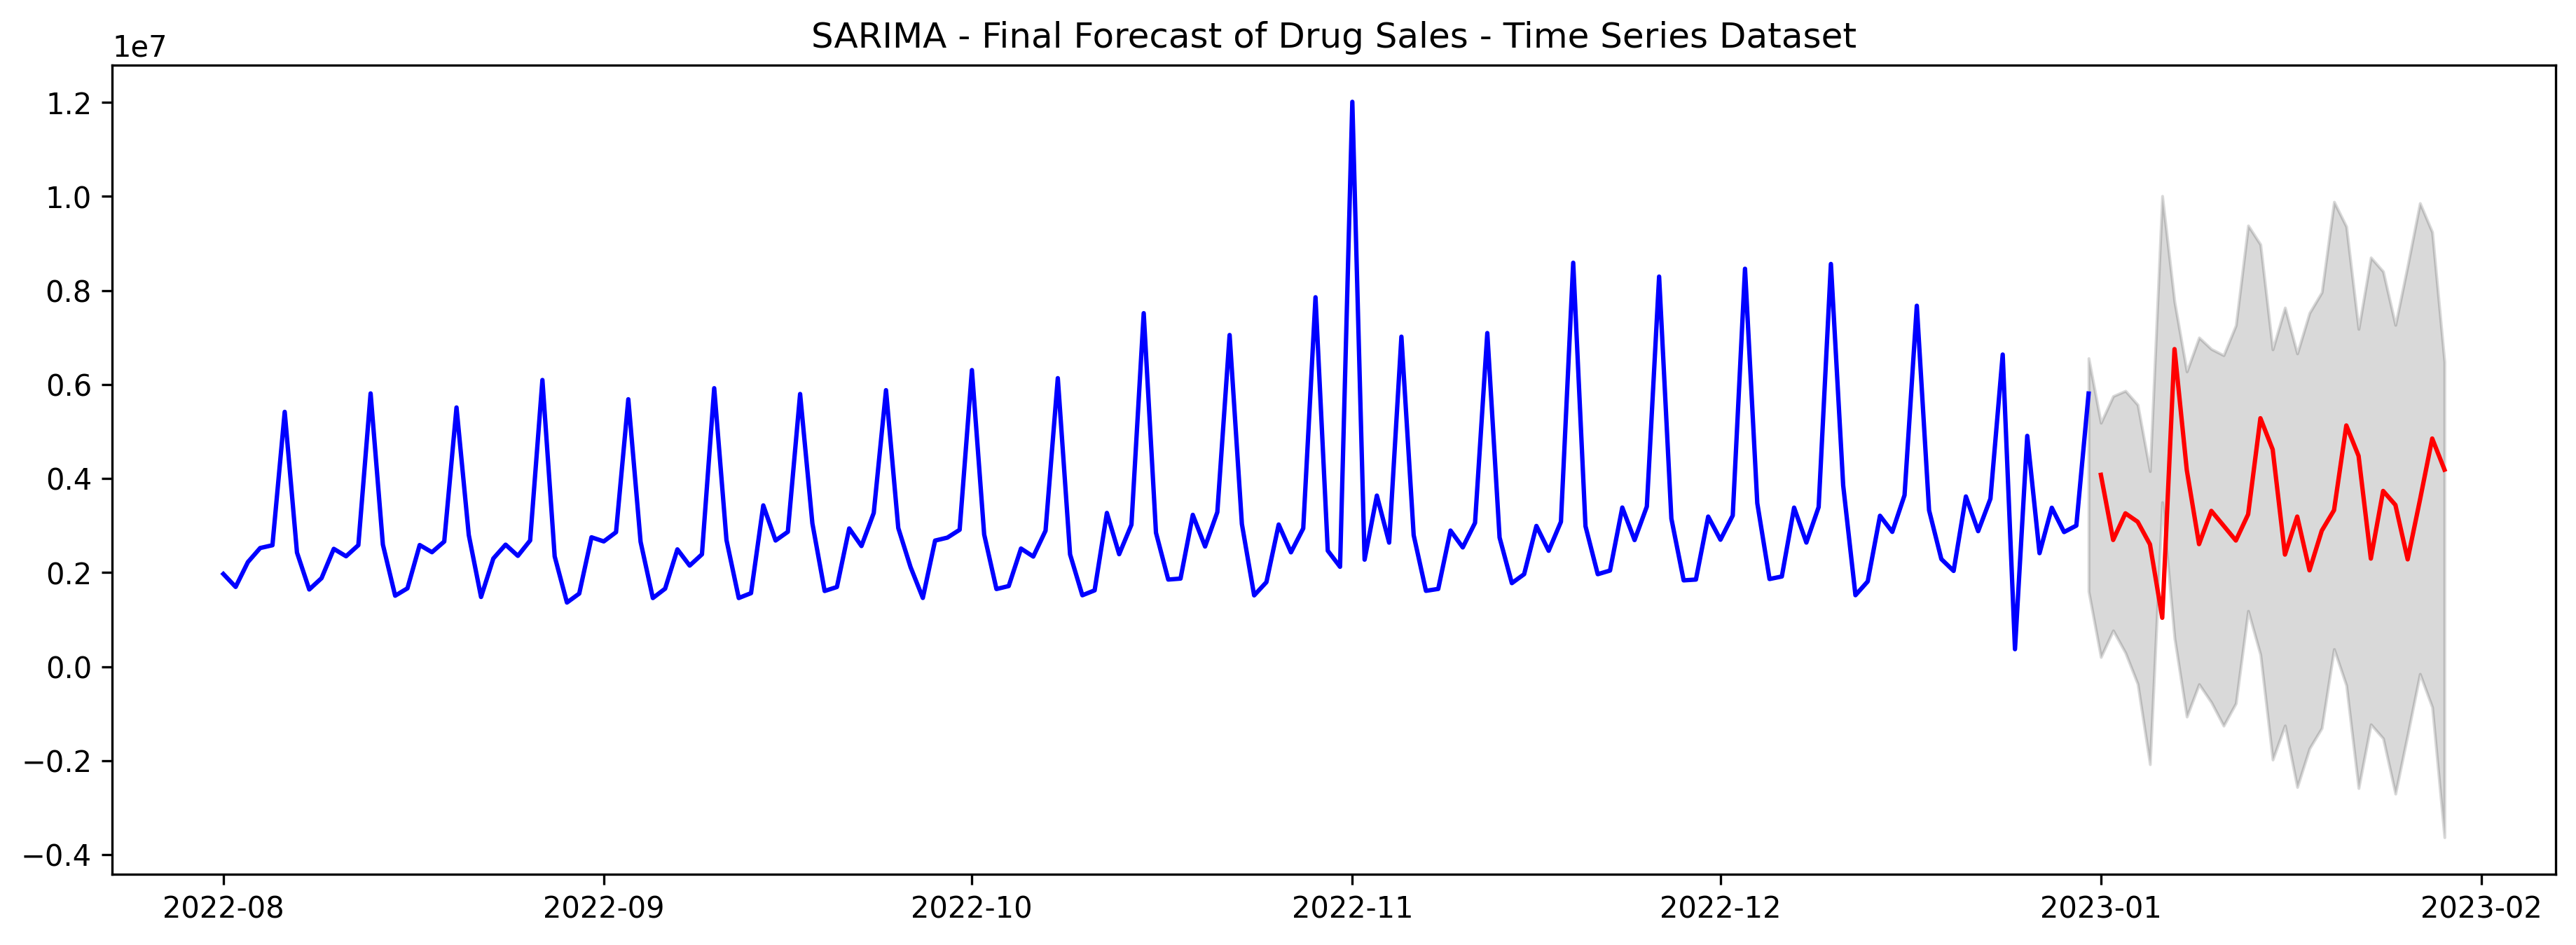

In [168]:
# Forecast
n_periods = 30
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
TT_fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


start_date = '2022-08-01'
end_date = '2022-12-31'

# Lấy dữ liệu trong khoảng thời gian đã chỉ định
desired_data = data.loc[start_date:end_date]


# Plot
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(desired_data, color='blue', label='Actual')
plt.plot(TT_fitted_series, color='red', label='Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

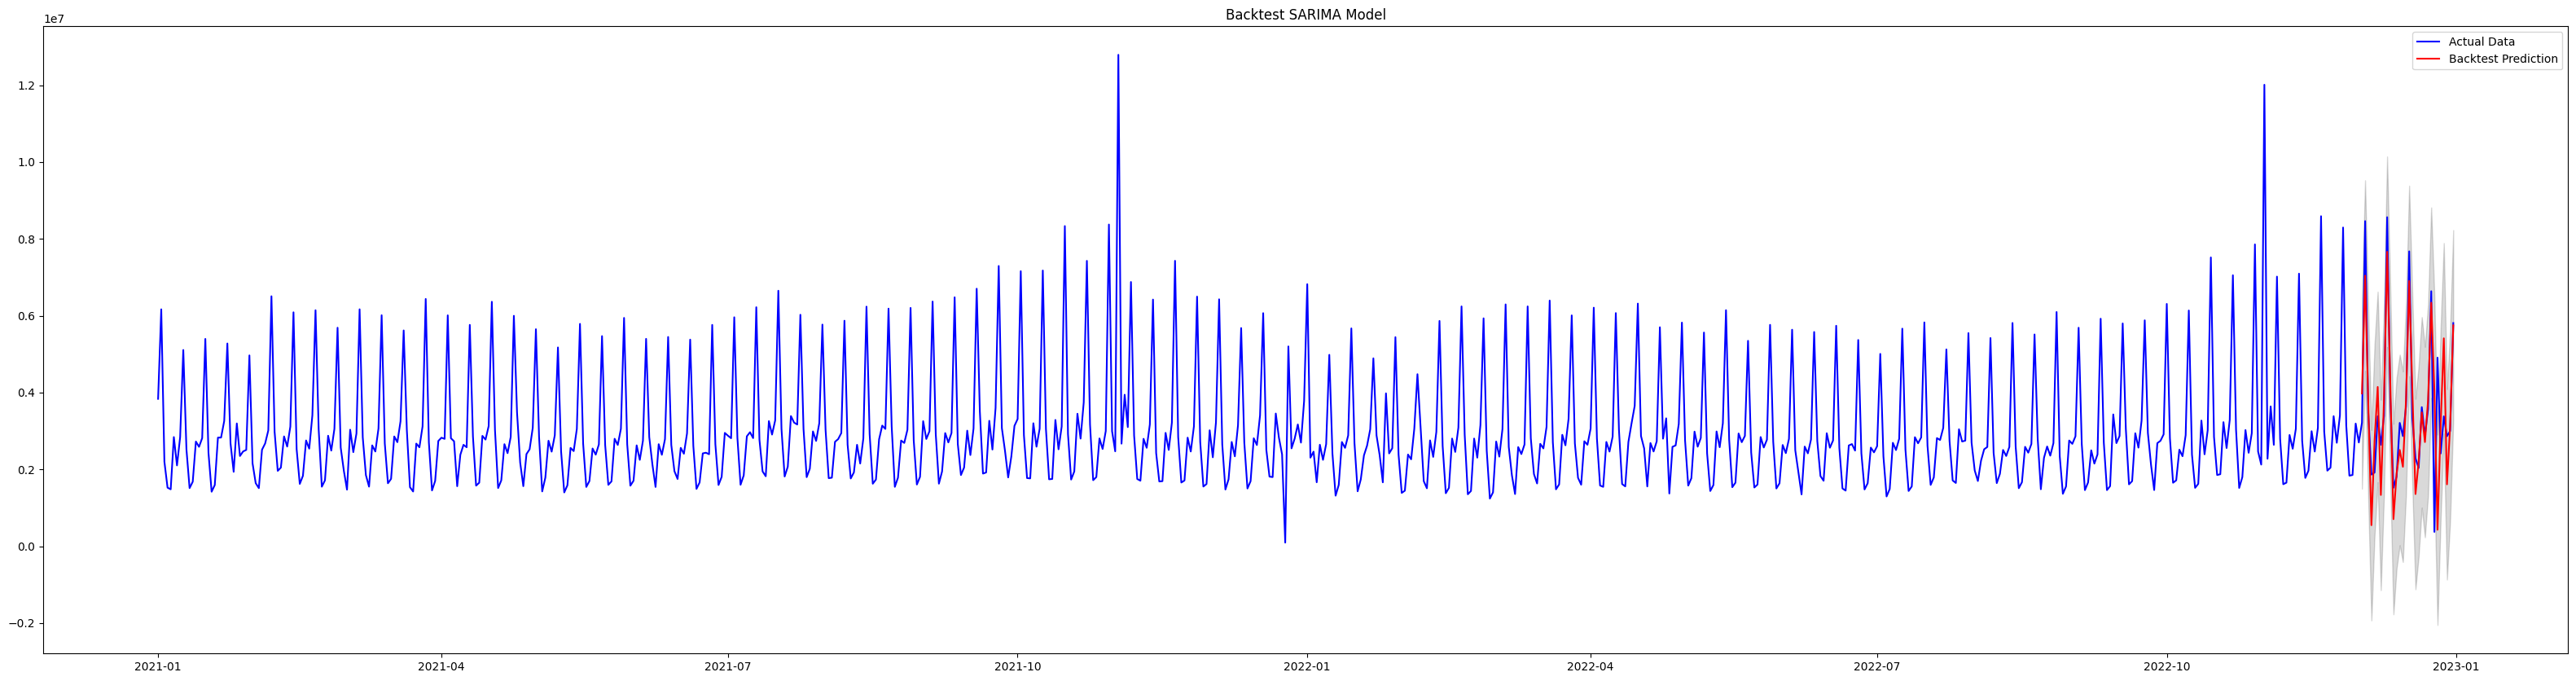

In [144]:
import matplotlib.pyplot as plt

# Chọn khoảng thời gian cho dự đoán lại. Ví dụ: 30 ngày cuối cùng của dữ liệu
backtest_start_date = data.index[-30]
backtest_end_date = data.index[-1]

# Sử dụng mô hình để dự đoán trong khoảng thời gian này
# Trong trường hợp này, chúng ta sẽ 'dự đoán' trên dữ liệu đã biết để so sánh
backtest_predictions, backtest_confint = smodel.predict_in_sample(start=backtest_start_date, end=backtest_end_date, return_conf_int=True)

# Tạo index cho dự đoán
backtest_index = pd.date_range(start=backtest_start_date, periods=len(backtest_predictions), freq='D')

# Tạo series cho mục đích vẽ biểu đồ
backtest_series = pd.Series(backtest_predictions, index=backtest_index)
backtest_lower_series = pd.Series(backtest_confint[:, 0], index=backtest_index)
backtest_upper_series = pd.Series(backtest_confint[:, 1], index=backtest_index)

# Vẽ biểu đồ dự đoán so với dữ liệu thực tế
plt.figure(figsize=(40, 10))
plt.plot(data, color='blue', label='Actual Data')
plt.plot(backtest_series, color='red', label='Backtest Prediction')
plt.fill_between(backtest_lower_series.index, 
                 backtest_lower_series, 
                 backtest_upper_series, 
                 color='k', alpha=.15)
plt.title("Backtest SARIMA Model")
plt.legend()
plt.show()

In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Giả sử backtest_series là Series chứa dự đoán của bạn, và data là Series chứa dữ liệu thực tế

# Lấy dữ liệu thực tế tương ứng với khoảng thời gian dự đoán
actual_data = data[backtest_start_date:backtest_end_date]

# Đảm bảo rằng dữ liệu thực tế và dữ liệu dự đoán có cùng độ dài
if len(backtest_series) == len(actual_data):
    # Tính toán các chỉ số đánh giá
    mae = mean_absolute_error(actual_data, backtest_series)
    mse = mean_squared_error(actual_data, backtest_series)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_data, backtest_series)

    # Tạo DataFrame để hiển thị các chỉ số đánh giá
    evaluation_df = pd.DataFrame({
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Value': [mae, mse, rmse, r2]
    })

    # Hiển thị DataFrame
    print(evaluation_df)
else:
    print("Dữ liệu thực tế và dữ liệu dự đoán không khớp. Vui lòng kiểm tra lại.")


  Metric         Value
0    MAE  8.927963e+05
1    MSE  1.748600e+12
2   RMSE  1.322346e+06
3     R2  5.378303e-01


In [169]:
TT_fitted_series

2022-12-31             NaN
2023-01-01    4.079720e+06
2023-01-02    2.694706e+06
2023-01-03    3.260883e+06
2023-01-04    3.080653e+06
2023-01-05    2.600883e+06
2023-01-06    1.039980e+06
2023-01-07    6.752860e+06
2023-01-08    4.182987e+06
2023-01-09    2.606073e+06
2023-01-10    3.312809e+06
2023-01-11    2.998237e+06
2023-01-12    2.683025e+06
2023-01-13    3.239720e+06
2023-01-14    5.283318e+06
2023-01-15    4.617836e+06
2023-01-16    2.383801e+06
2023-01-17    3.192275e+06
2023-01-18    2.048910e+06
2023-01-19    2.891160e+06
2023-01-20    3.327866e+06
2023-01-21    5.129532e+06
2023-01-22    4.481336e+06
2023-01-23    2.298435e+06
2023-01-24    3.736849e+06
2023-01-25    3.439208e+06
2023-01-26    2.281949e+06
2023-01-27    3.543194e+06
2023-01-28    4.851553e+06
2023-01-29    4.189682e+06
Freq: D, dtype: float64

## 2. DEVIDENDS PAID TREND

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Tính tổng các DIVIDENDS_PAID theo ngày
data_dividends = df.groupby('DATE_DIM')['DIVIDENDS_PAID'].sum().reset_index()

# Chuyển cột 'DATE_DIM' thành kiểu dữ liệu datetime và đặt làm chỉ mục
data_dividends['DATE_DIM'] = pd.to_datetime(data_dividends['DATE_DIM'])
data_dividends.set_index('DATE_DIM', inplace=True)

In [147]:
data_dividends

DIVIDENDS_PAID
DATE_DIM                  
2021-01-01      3114833.37
2021-01-02      4950862.44
2021-01-03      1827063.93
2021-01-04      1287379.59
2021-01-05      1213781.16
...                    ...
2022-12-27      1926894.16
2022-12-28      2825493.67
2022-12-29      2417466.10
2022-12-30      2494589.62
2022-12-31      5034195.27

[730 rows x 1 columns]

In [197]:
df_trend = data_dividends.copy()

# Perform ADF test on the 'TOTAL_TURNOVER' column of df_daily_trend
adf_result_total_turnover = adfuller(df_trend['DIVIDENDS_PAID'], autolag='AIC')

# Convert the result to a DataFrame for a cleaner presentation
adf_result_df = pd.DataFrame({
    'Metric': ['ADF Statistic', 'p-value', '1% Critical Value', '5% Critical Value', '10% Critical Value'],
    'Value': [
        adf_result_total_turnover[0],
        adf_result_total_turnover[1],
        adf_result_total_turnover[4]['1%'],
        adf_result_total_turnover[4]['5%'],
        adf_result_total_turnover[4]['10%']
    ]
})

adf_result_df

Metric     Value
0       ADF Statistic -2.513033
1             p-value  0.112335
2   1% Critical Value -3.439607
3   5% Critical Value -2.865625
4  10% Critical Value -2.568945

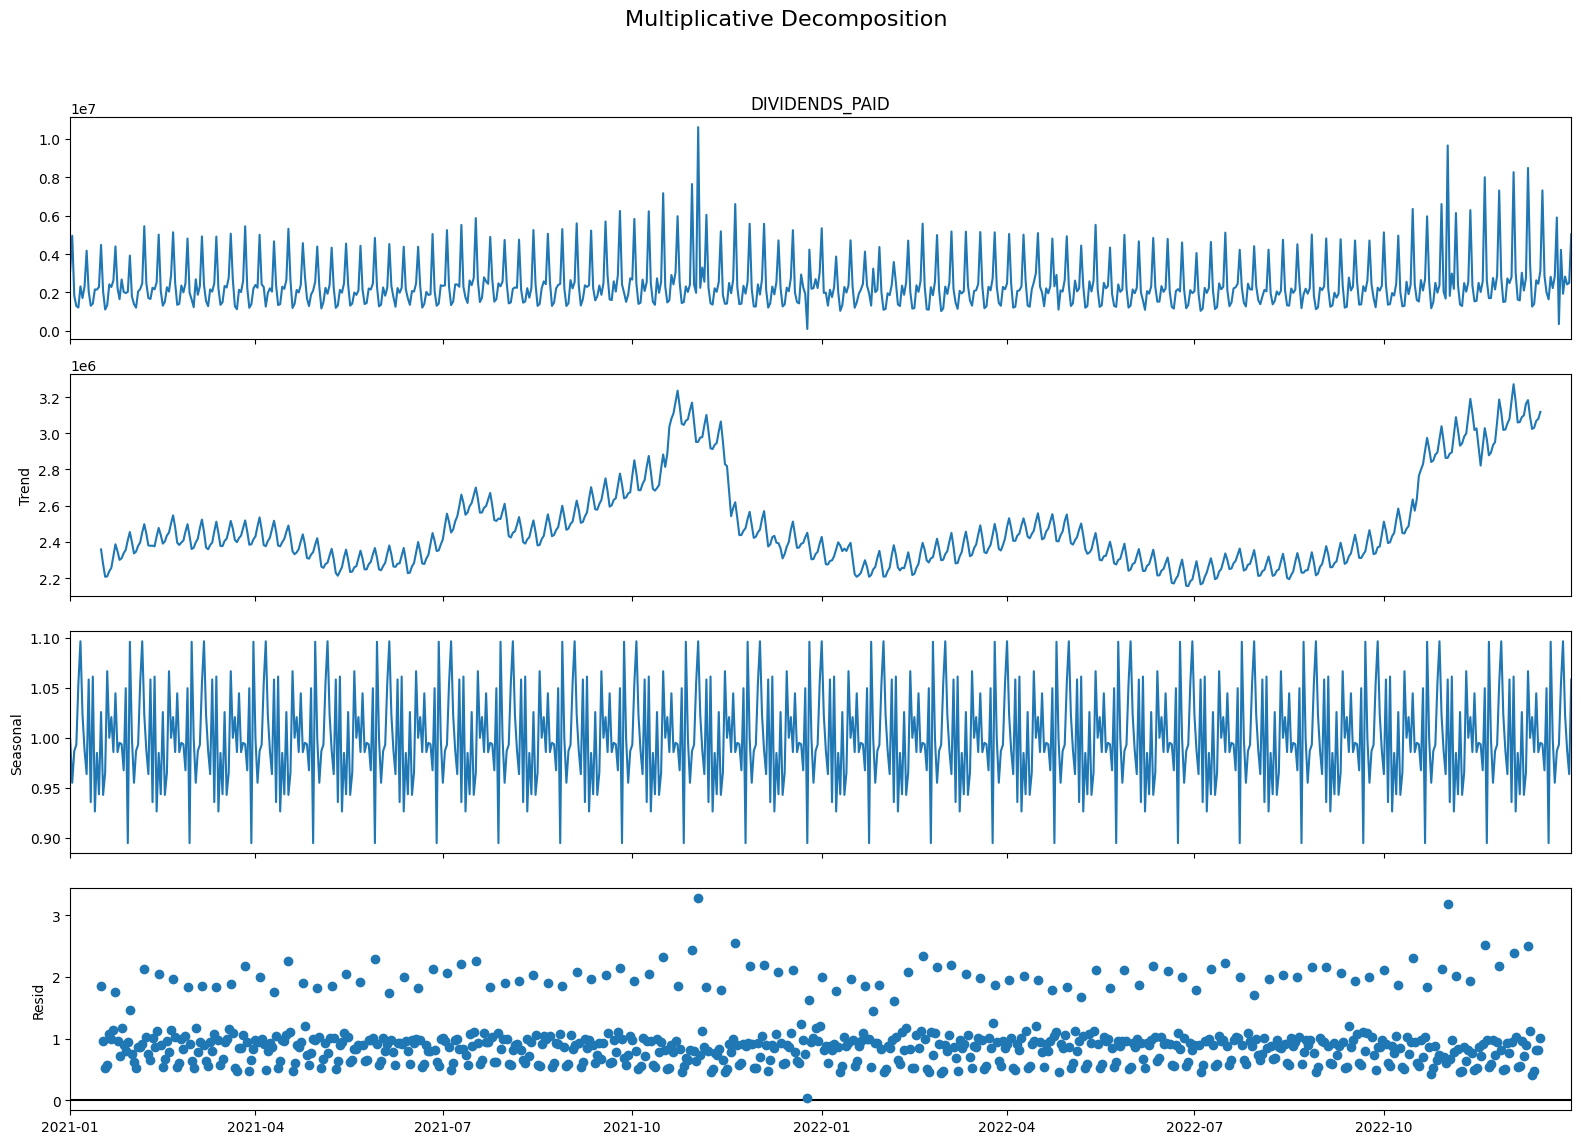

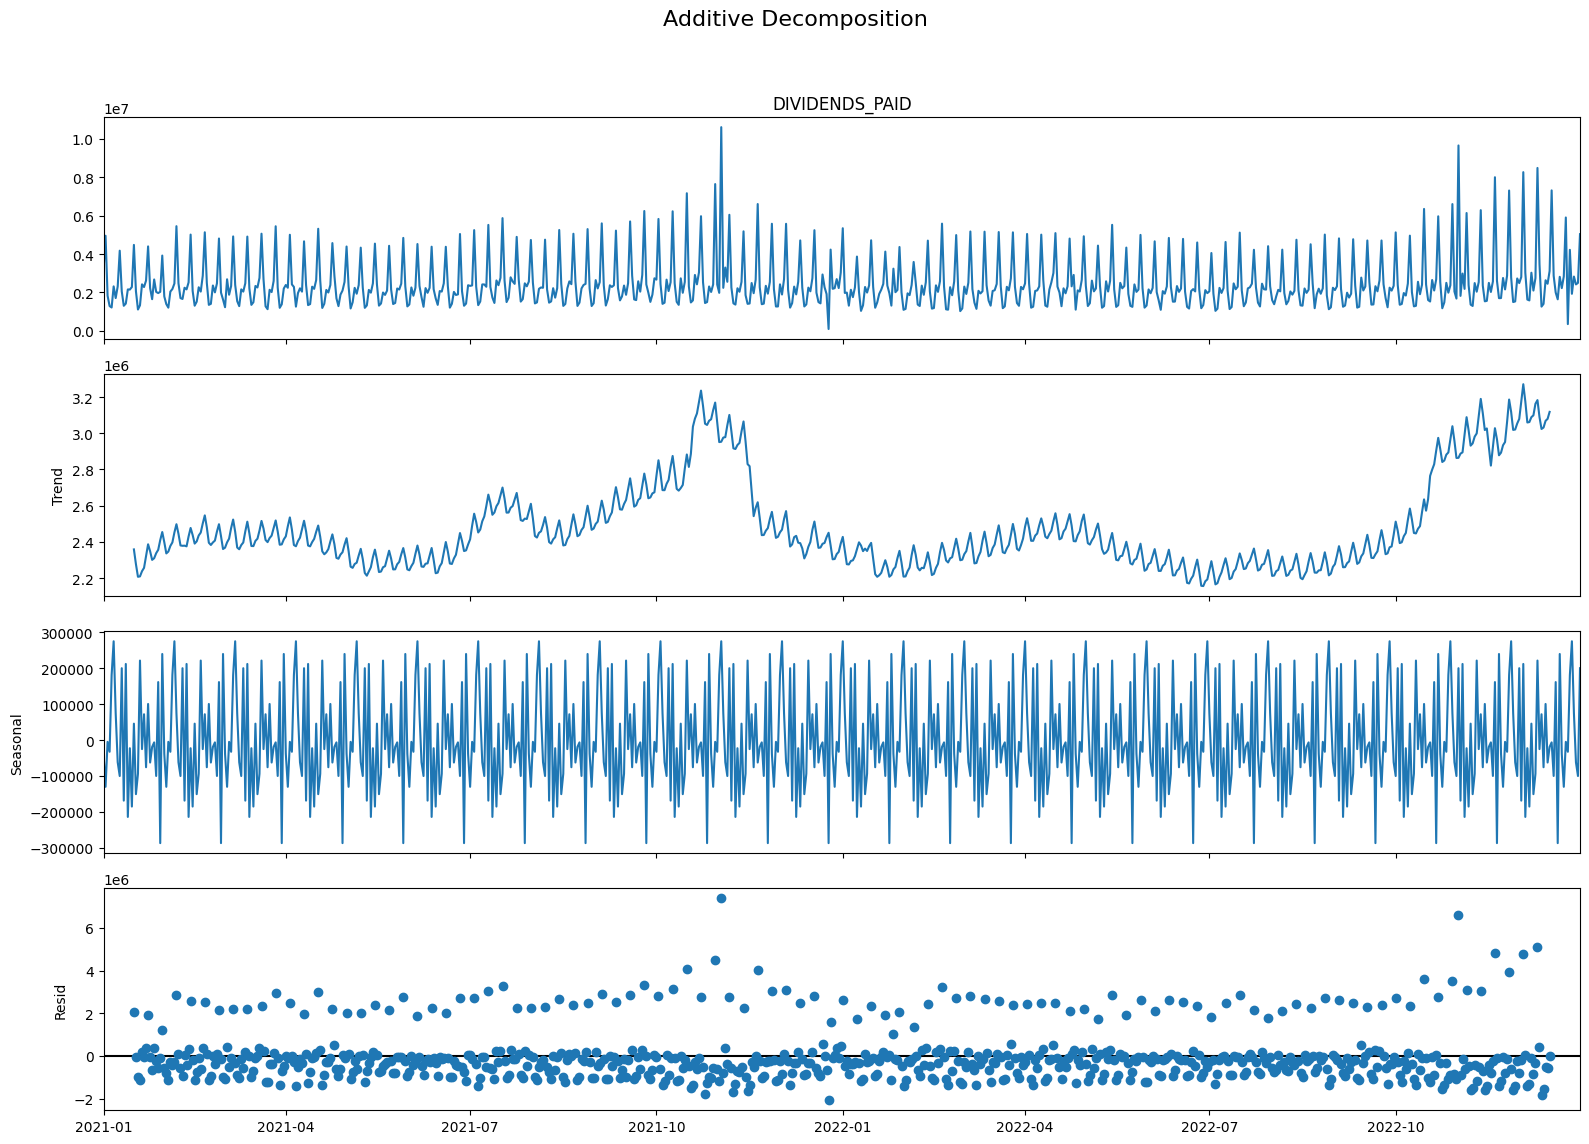

In [200]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df_daily_trend = data_dividends.copy()

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_daily_trend['DIVIDENDS_PAID'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_daily_trend['DIVIDENDS_PAID'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [159]:
# Xây dựng mô hình SARIMA
model = pm.auto_arima(data_dividends, start_p=1, start_q=1,
                       test='adf',
                       max_p=2, max_q=2, m=12,
                       start_P=0, seasonal=True,
                       d=None, D=1, trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=22936.683, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=22715.289, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=22934.798, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=22932.517, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=22617.694, Time=2.60 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.24 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=22618.852, Time=6.13 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=22514.339, Time=3.22 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=22635.641, Time=1.89 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.26 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  730
Model:             SARIMAX(1, 0, 2)x(2, 1, [], 12)   Log Likelihood              -11226.181
Date:                             Mon, 01 Apr 2024   AIC                          22464.362
Time:                                     02:23:09   BIC                          22491.821
Sample:                                 01-01-2021   HQIC                         22474.964
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5853      0.058    -10.012      0.000      -0.700      -0.471
ma.L1          0.4381      0.059      7.433      0.000       0.323       0.554
ma.L2         -0.4511      0.046     -9.830      0.000      -0.541      -0.361
ar.S.L12      -0.6517      0.038    -16.986      0.000      -0.727      -0.576
ar.S.L24      -0.5444      0.045    -12.147      0.000      -0.632      -0.457
sigma2      2.869e+12   8.59e-15   3.34e+26      0.000    2.87e+12    2.87e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               184.57
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.98e+41. Standard errors may be unstable.
"""

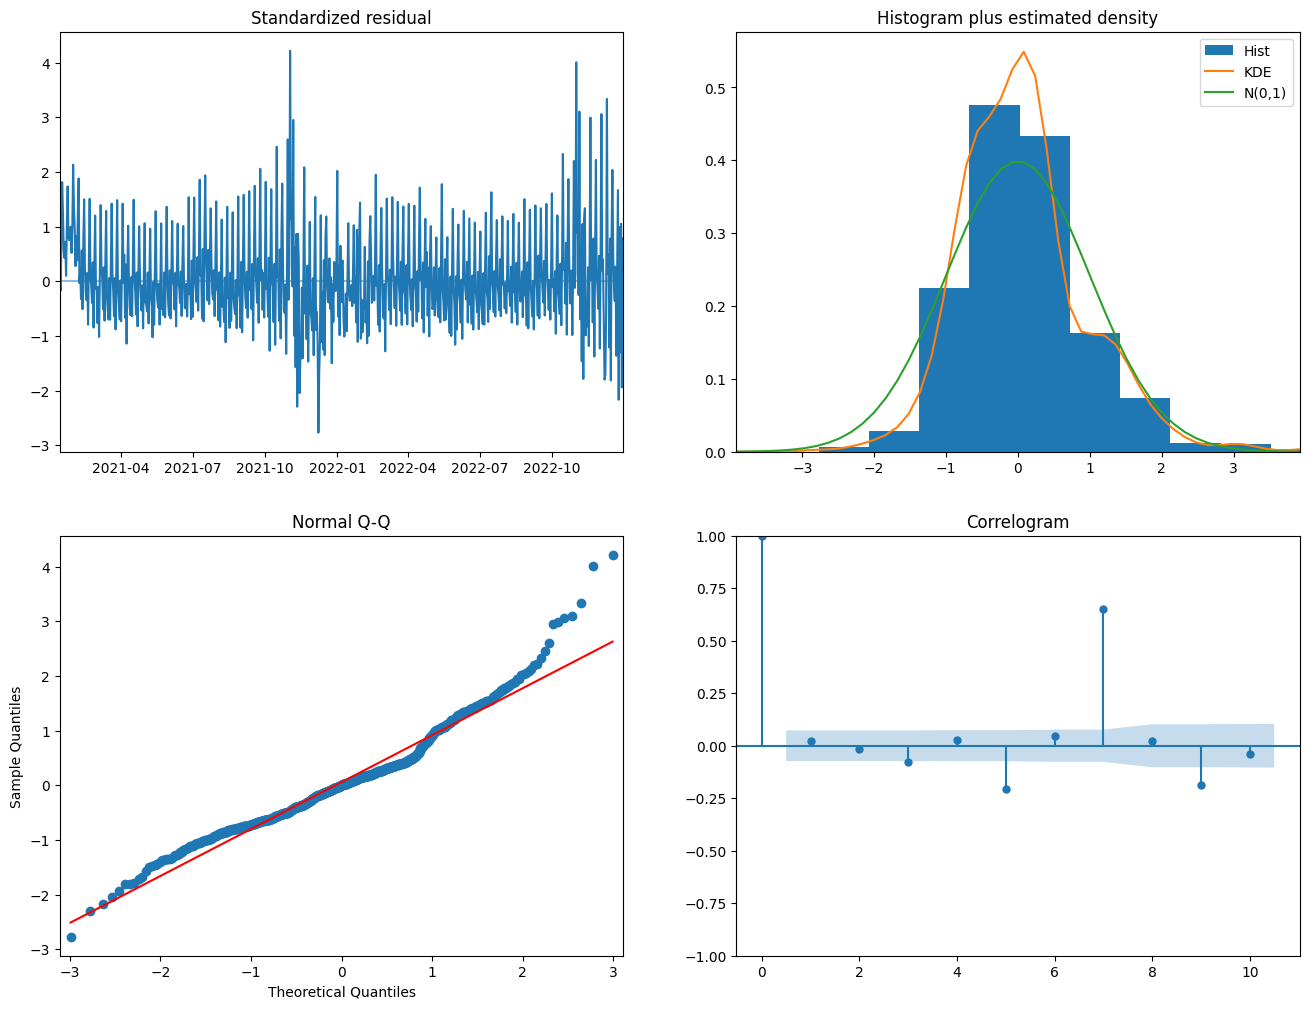

In [194]:
model.plot_diagnostics()
plt.show()

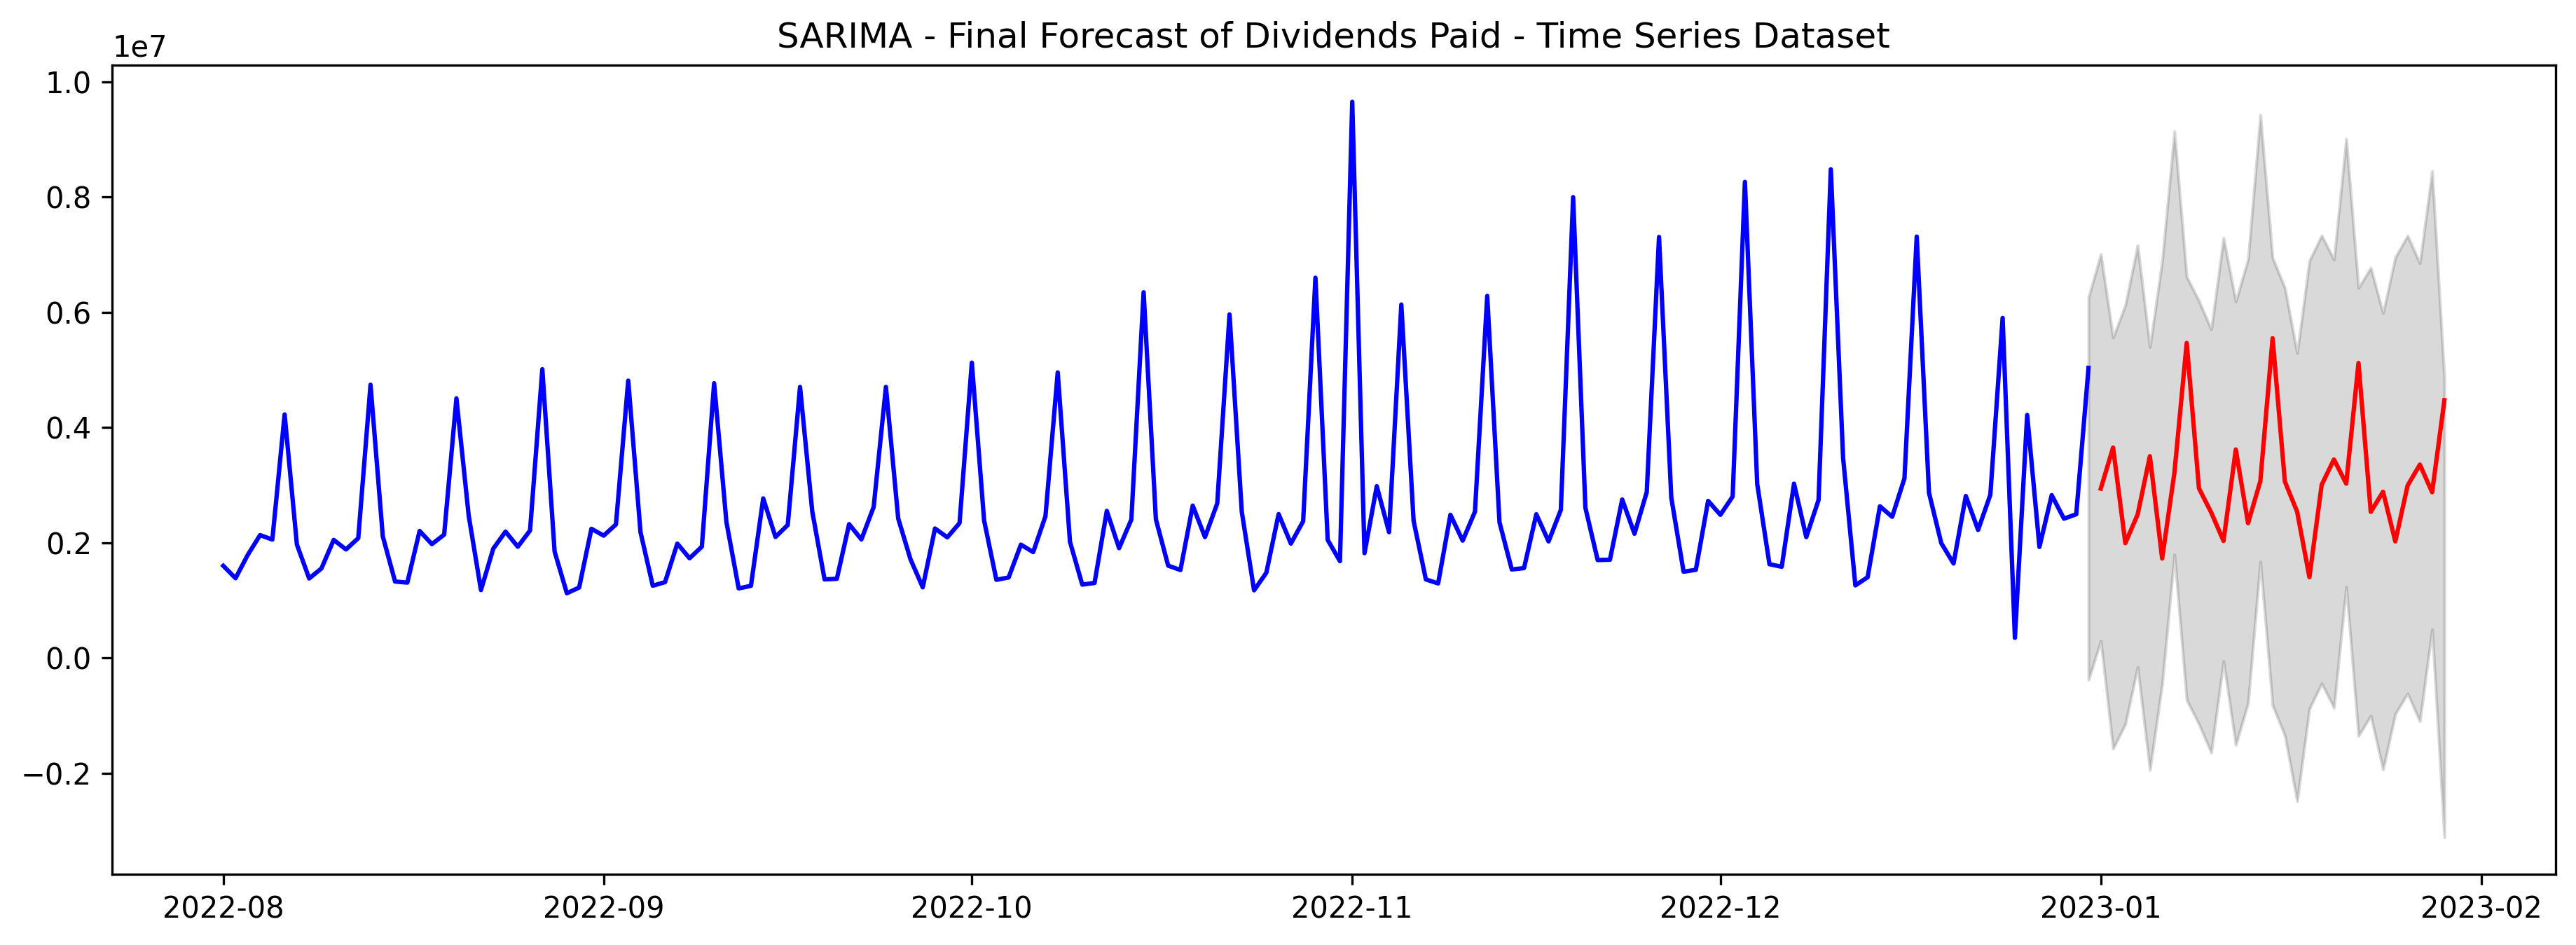

In [170]:
# Dự đoán
n_periods = 30
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data_dividends.index[-1], periods=n_periods, freq='D')

# Chuẩn bị series để vẽ biểu đồ
DP_fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Lấy dữ liệu trong khoảng thời gian cần dự đoán
start_date = '2022-08-01'
end_date = '2022-12-31'
desired_data = data_dividends.loc[start_date:end_date]

# Vẽ biểu đồ
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(desired_data, color='blue', label='Actual')
plt.plot(DP_fitted_series, color='red', label='Forecast')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)
plt.title("SARIMA - Final Forecast of Dividends Paid - Time Series Dataset")
plt.show()

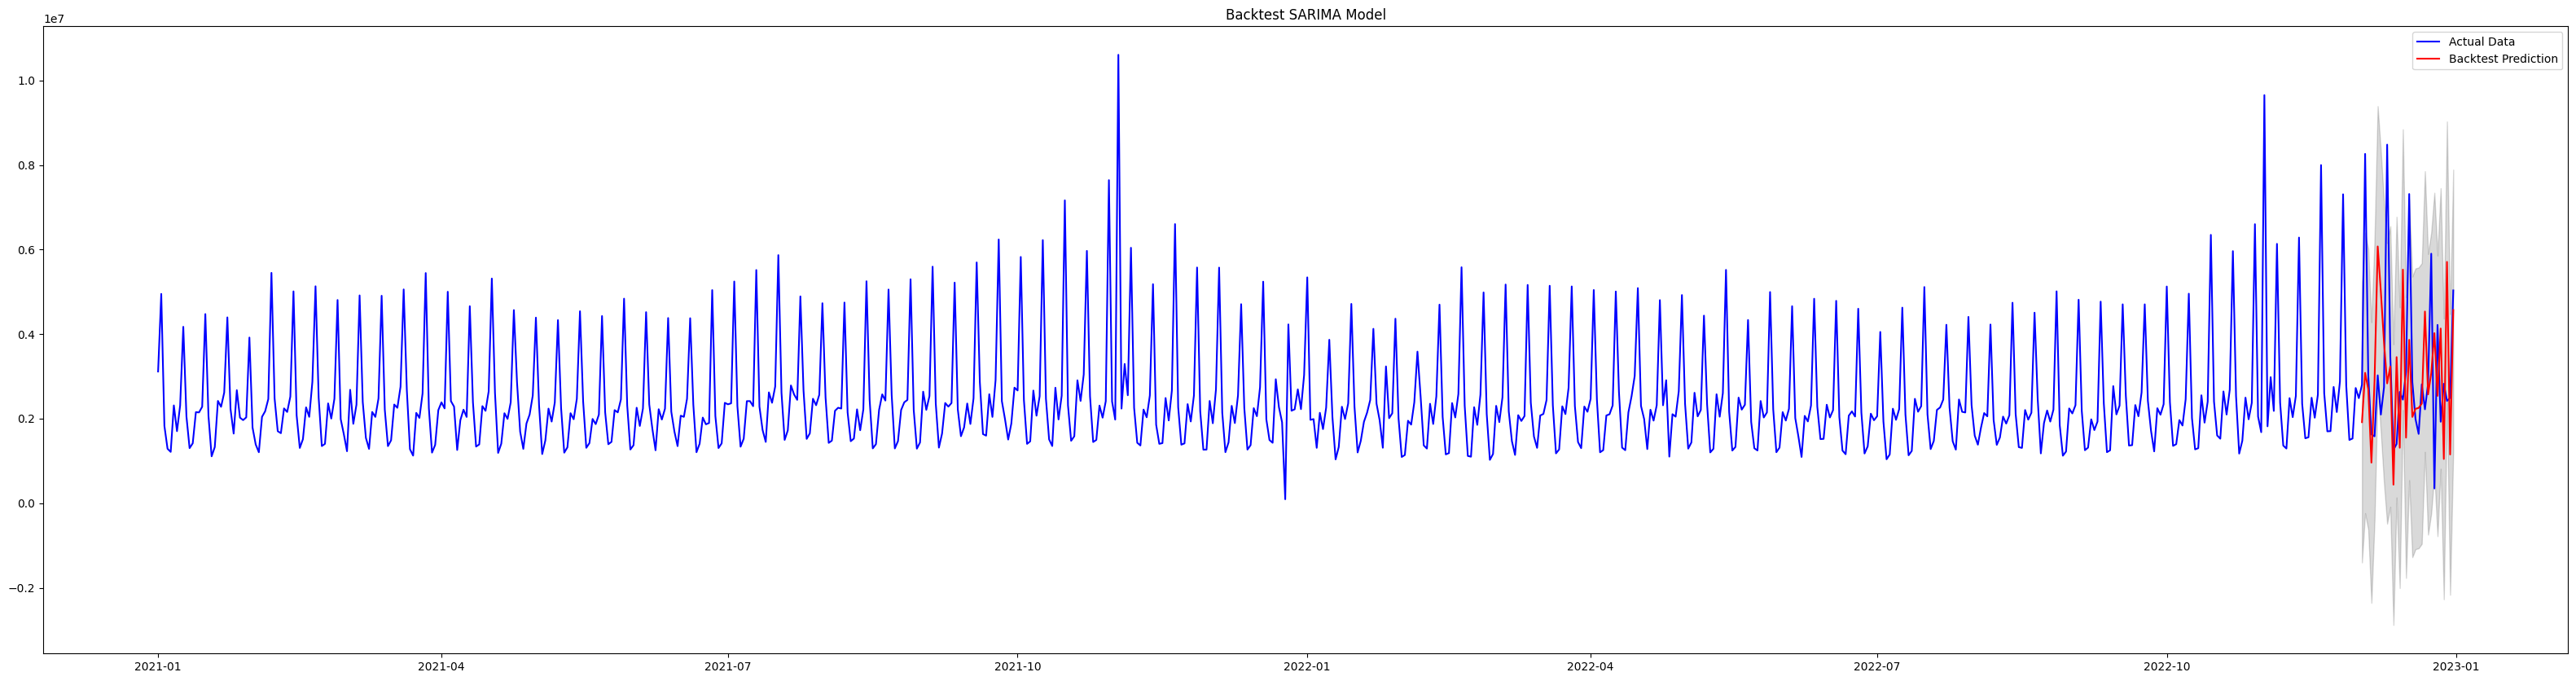

In [161]:
# Dự đoán lại với mô hình
backtest_start_date = data_dividends.index[-30]
backtest_end_date = data_dividends.index[-1]
backtest_predictions, backtest_confint = model.predict_in_sample(start=backtest_start_date, end=backtest_end_date, return_conf_int=True)
backtest_index = pd.date_range(start=backtest_start_date, periods=len(backtest_predictions), freq='D')
backtest_series = pd.Series(backtest_predictions, index=backtest_index)
backtest_lower_series = pd.Series(backtest_confint[:, 0], index=backtest_index)
backtest_upper_series = pd.Series(backtest_confint[:, 1], index=backtest_index)

# Vẽ biểu đồ
plt.figure(figsize=(40, 10))
plt.plot(data_dividends, color='blue', label='Actual Data')
plt.plot(backtest_series, color='red', label='Backtest Prediction')
plt.fill_between(backtest_lower_series.index,
                 backtest_lower_series,
                 backtest_upper_series,
                 color='k', alpha=.15)
plt.title("Backtest SARIMA Model")
plt.legend()
plt.show()

In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Đánh giá mô hình
actual_data_dividends = data_dividends[backtest_start_date:backtest_end_date]
if len(backtest_series) == len(actual_data_dividends):
    mae_dividends = mean_absolute_error(actual_data_dividends, backtest_series)
    mse_dividends = mean_squared_error(actual_data_dividends, backtest_series)
    rmse_dividends = np.sqrt(mse_dividends)
    r2_dividends = r2_score(actual_data_dividends, backtest_series)

    # Tạo DataFrame để hiển thị các chỉ số đánh giá
    evaluation_df_dividends = pd.DataFrame({
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Value': [mae_dividends, mse_dividends, rmse_dividends, r2_dividends]
    })

    # Hiển thị DataFrame
    print(evaluation_df_dividends)
else:
    print("Dữ liệu thực tế và dữ liệu dự đoán không khớp. Vui lòng kiểm tra lại.")


  Metric         Value
0    MAE  1.850815e+06
1    MSE  5.435090e+12
2   RMSE  2.331328e+06
3     R2 -4.423255e-01


In [171]:
DP_fitted_series

2022-12-31             NaN
2023-01-01    2.939397e+06
2023-01-02    3.652344e+06
2023-01-03    1.992488e+06
2023-01-04    2.488459e+06
2023-01-05    3.501768e+06
2023-01-06    1.726049e+06
2023-01-07    3.216962e+06
2023-01-08    5.467207e+06
2023-01-09    2.943662e+06
2023-01-10    2.523937e+06
2023-01-11    2.031055e+06
2023-01-12    3.618267e+06
2023-01-13    2.338951e+06
2023-01-14    3.067850e+06
2023-01-15    5.549128e+06
2023-01-16    3.061634e+06
2023-01-17    2.538277e+06
2023-01-18    1.401937e+06
2023-01-19    3.005773e+06
2023-01-20    3.444935e+06
2023-01-21    3.025145e+06
2023-01-22    5.120287e+06
2023-01-23    2.535524e+06
2023-01-24    2.884980e+06
2023-01-25    2.022554e+06
2023-01-26    2.990924e+06
2023-01-27    3.356277e+06
2023-01-28    2.876133e+06
2023-01-29    4.472819e+06
Freq: D, dtype: float64

## 3 CROSS MARGIN TREND

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Tính tổng các GROSS_MARGIN theo ngày
data_gross_margin = df.groupby('DATE_DIM')['GROSS_MARGIN'].sum().reset_index()

# Chuyển cột 'DATE_DIM' thành kiểu dữ liệu datetime và đặt làm chỉ mục
data_gross_margin['DATE_DIM'] = pd.to_datetime(data_gross_margin['DATE_DIM'])
data_gross_margin.set_index('DATE_DIM', inplace=True)

data_gross_margin

GROSS_MARGIN
DATE_DIM                
2021-01-01  6.122096e+05
2021-01-02  1.108762e+06
2021-01-03  3.291153e+05
2021-01-04  1.998306e+05
2021-01-05  2.517540e+05
...                  ...
2022-12-27  3.966107e+05
2022-12-28  5.065771e+05
2022-12-29  3.732470e+05
2022-12-30  4.467454e+05
2022-12-31  6.953259e+05

[730 rows x 1 columns]

In [199]:
df_trend = data_gross_margin.copy()

# Perform ADF test on the 'TOTAL_TURNOVER' column of df_daily_trend
adf_result_total_turnover = adfuller(df_trend['GROSS_MARGIN'], autolag='AIC')

# Convert the result to a DataFrame for a cleaner presentation
adf_result_df = pd.DataFrame({
    'Metric': ['ADF Statistic', 'p-value', '1% Critical Value', '5% Critical Value', '10% Critical Value'],
    'Value': [
        adf_result_total_turnover[0],
        adf_result_total_turnover[1],
        adf_result_total_turnover[4]['1%'],
        adf_result_total_turnover[4]['5%'],
        adf_result_total_turnover[4]['10%']
    ]
})

adf_result_df

Metric     Value
0       ADF Statistic -4.343868
1             p-value  0.000373
2   1% Critical Value -3.439607
3   5% Critical Value -2.865625
4  10% Critical Value -2.568945

In [203]:
data_gross_margin[data_gross_margin['GROSS_MARGIN']<0]

GROSS_MARGIN
DATE_DIM                
2021-12-25   -302.120000
2022-12-10 -43657.831485

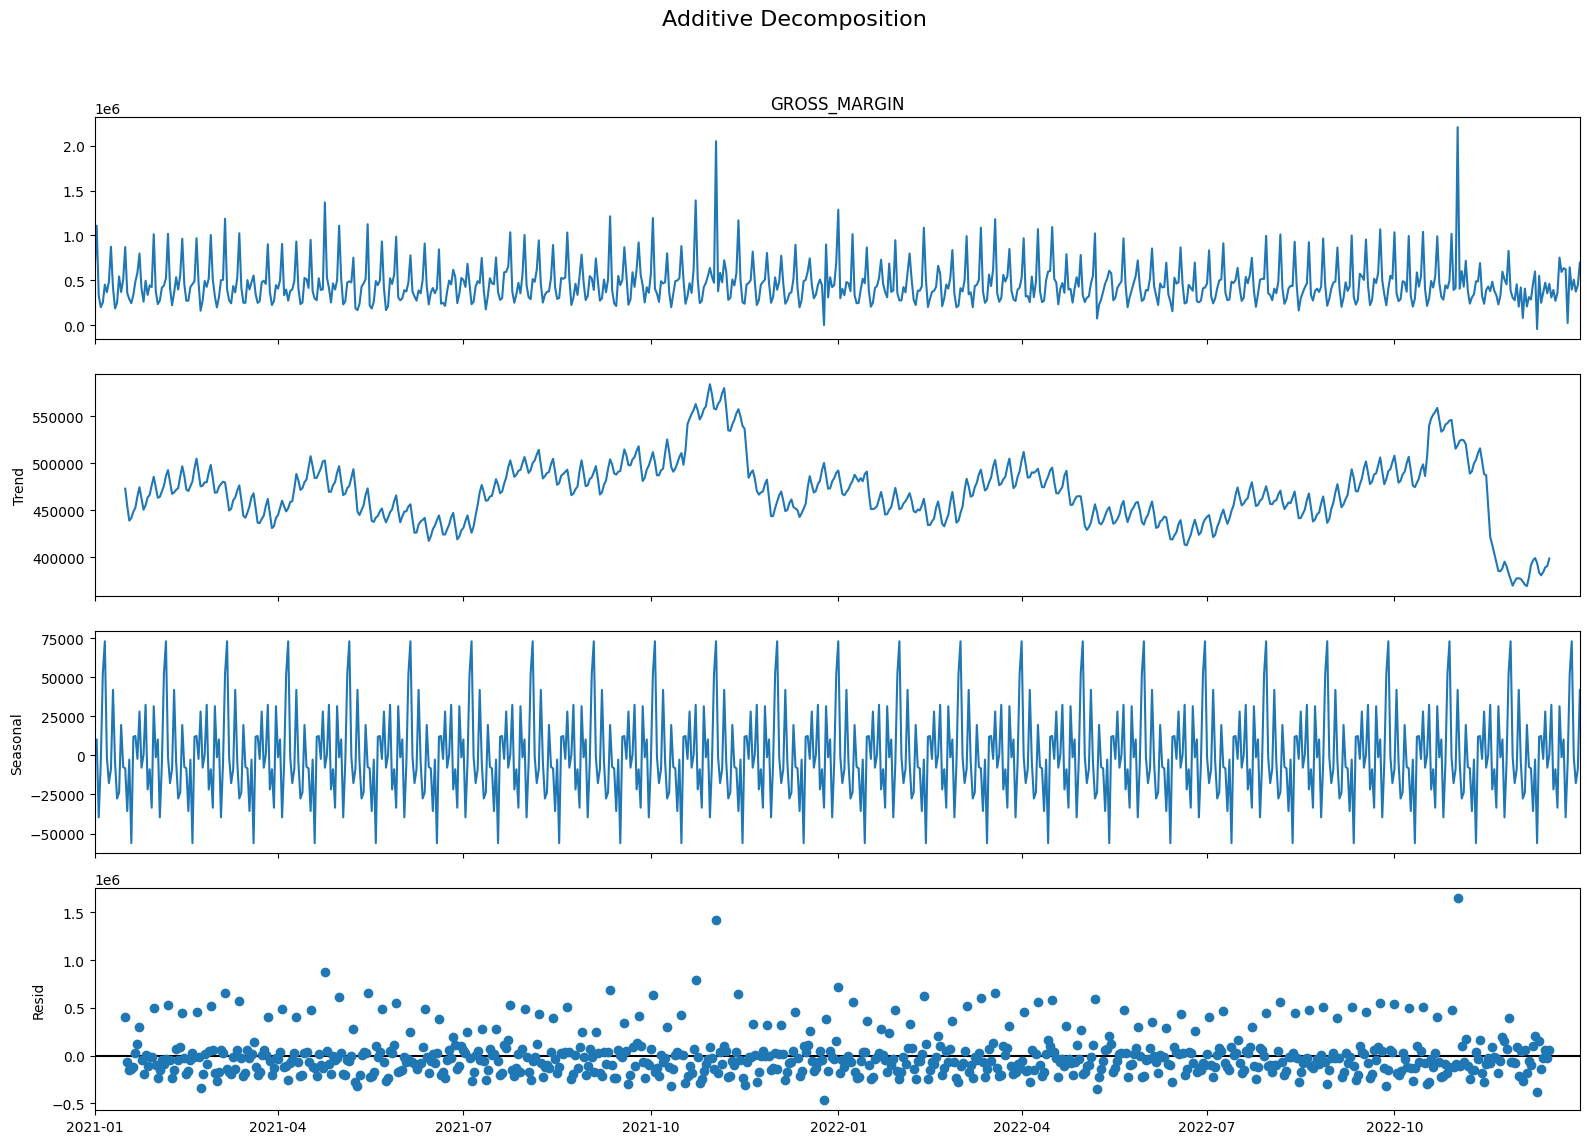

In [204]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df_daily_trend = data_gross_margin.copy()

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_daily_trend['GROSS_MARGIN'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [179]:
# Xây dựng mô hình SARIMA
model_gm = pm.auto_arima(data_gross_margin, start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

model_gm.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=20426.203, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=20220.849, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=20424.305, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=20419.621, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=20126.159, Time=3.57 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.83 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=20127.809, Time=8.77 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=20071.959, Time=3.94 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=20164.254, Time=0.72 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.59 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  730
Model:             SARIMAX(4, 0, 0)x(2, 1, 0, 12)   Log Likelihood              -10001.998
Date:                            Mon, 01 Apr 2024   AIC                          20017.996
Time:                                    02:52:55   BIC                          20050.032
Sample:                                01-01-2021   HQIC                         20030.365
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0588      0.065      0.902      0.367      -0.069       0.187
ar.L2         -0.0481      0.071     -0.674      0.500      -0.188       0.092
ar.L3         -0.2876      0.051     -5.666      0.000      -0.387      -0.188
ar.L4         -0.2775      0.044     -6.254      0.000      -0.364      -0.191
ar.S.L12      -0.8685      0.047    -18.457      0.000      -0.961      -0.776
ar.S.L24      -0.2953      0.043     -6.855      0.000      -0.380      -0.211
sigma2      1.043e+11   3.25e-13   3.21e+23      0.000    1.04e+11    1.04e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               678.71
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.97
Prob(H) (two-sided):                  0.24   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.18e+37. Standard errors may be unstable.
"""

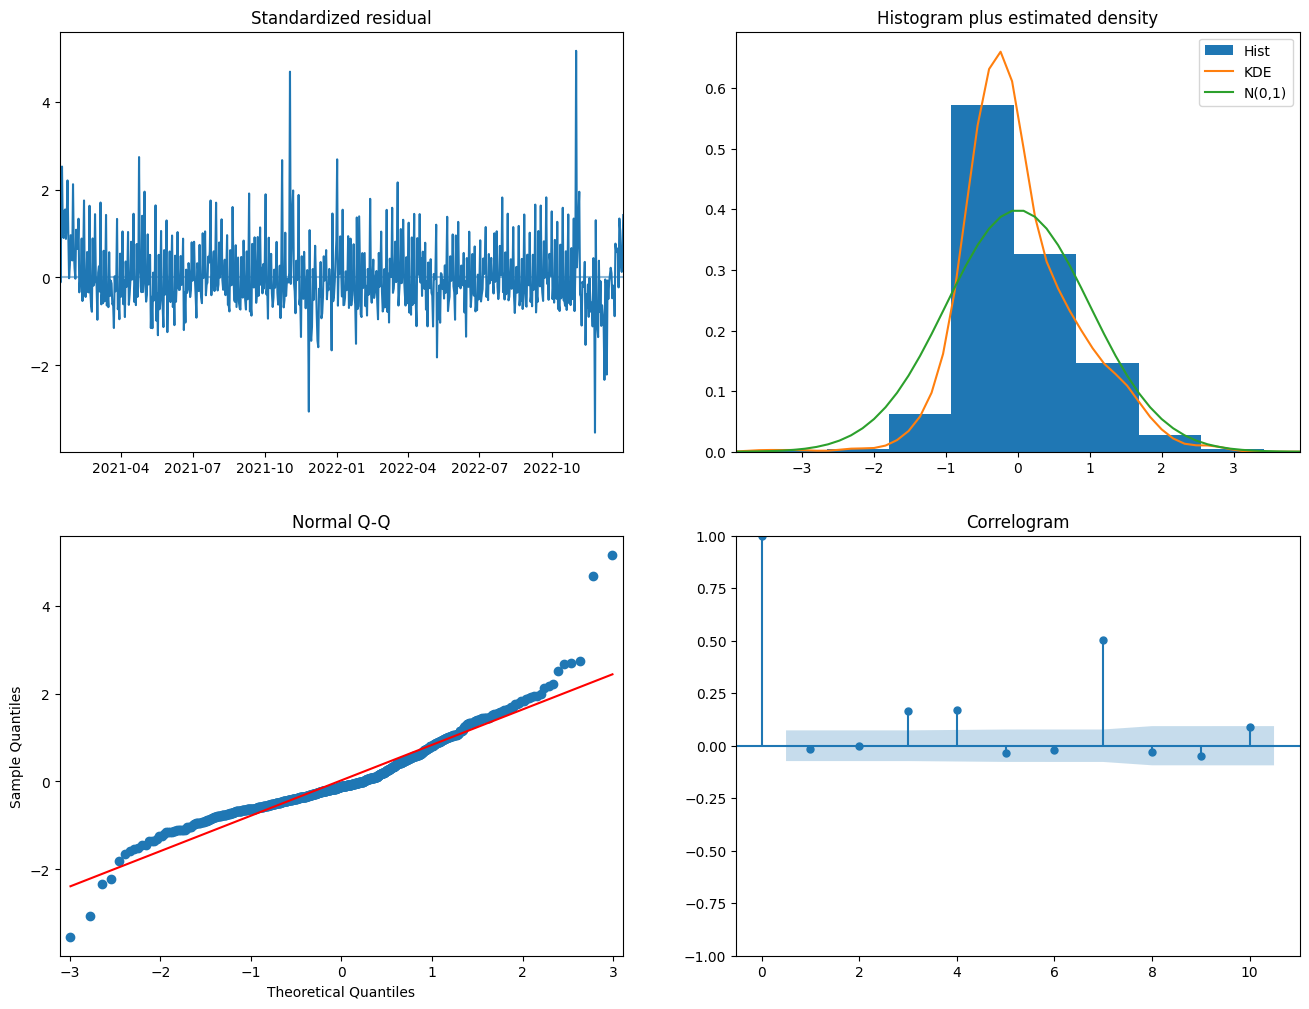

In [195]:
model_gm.plot_diagnostics()
plt.show()

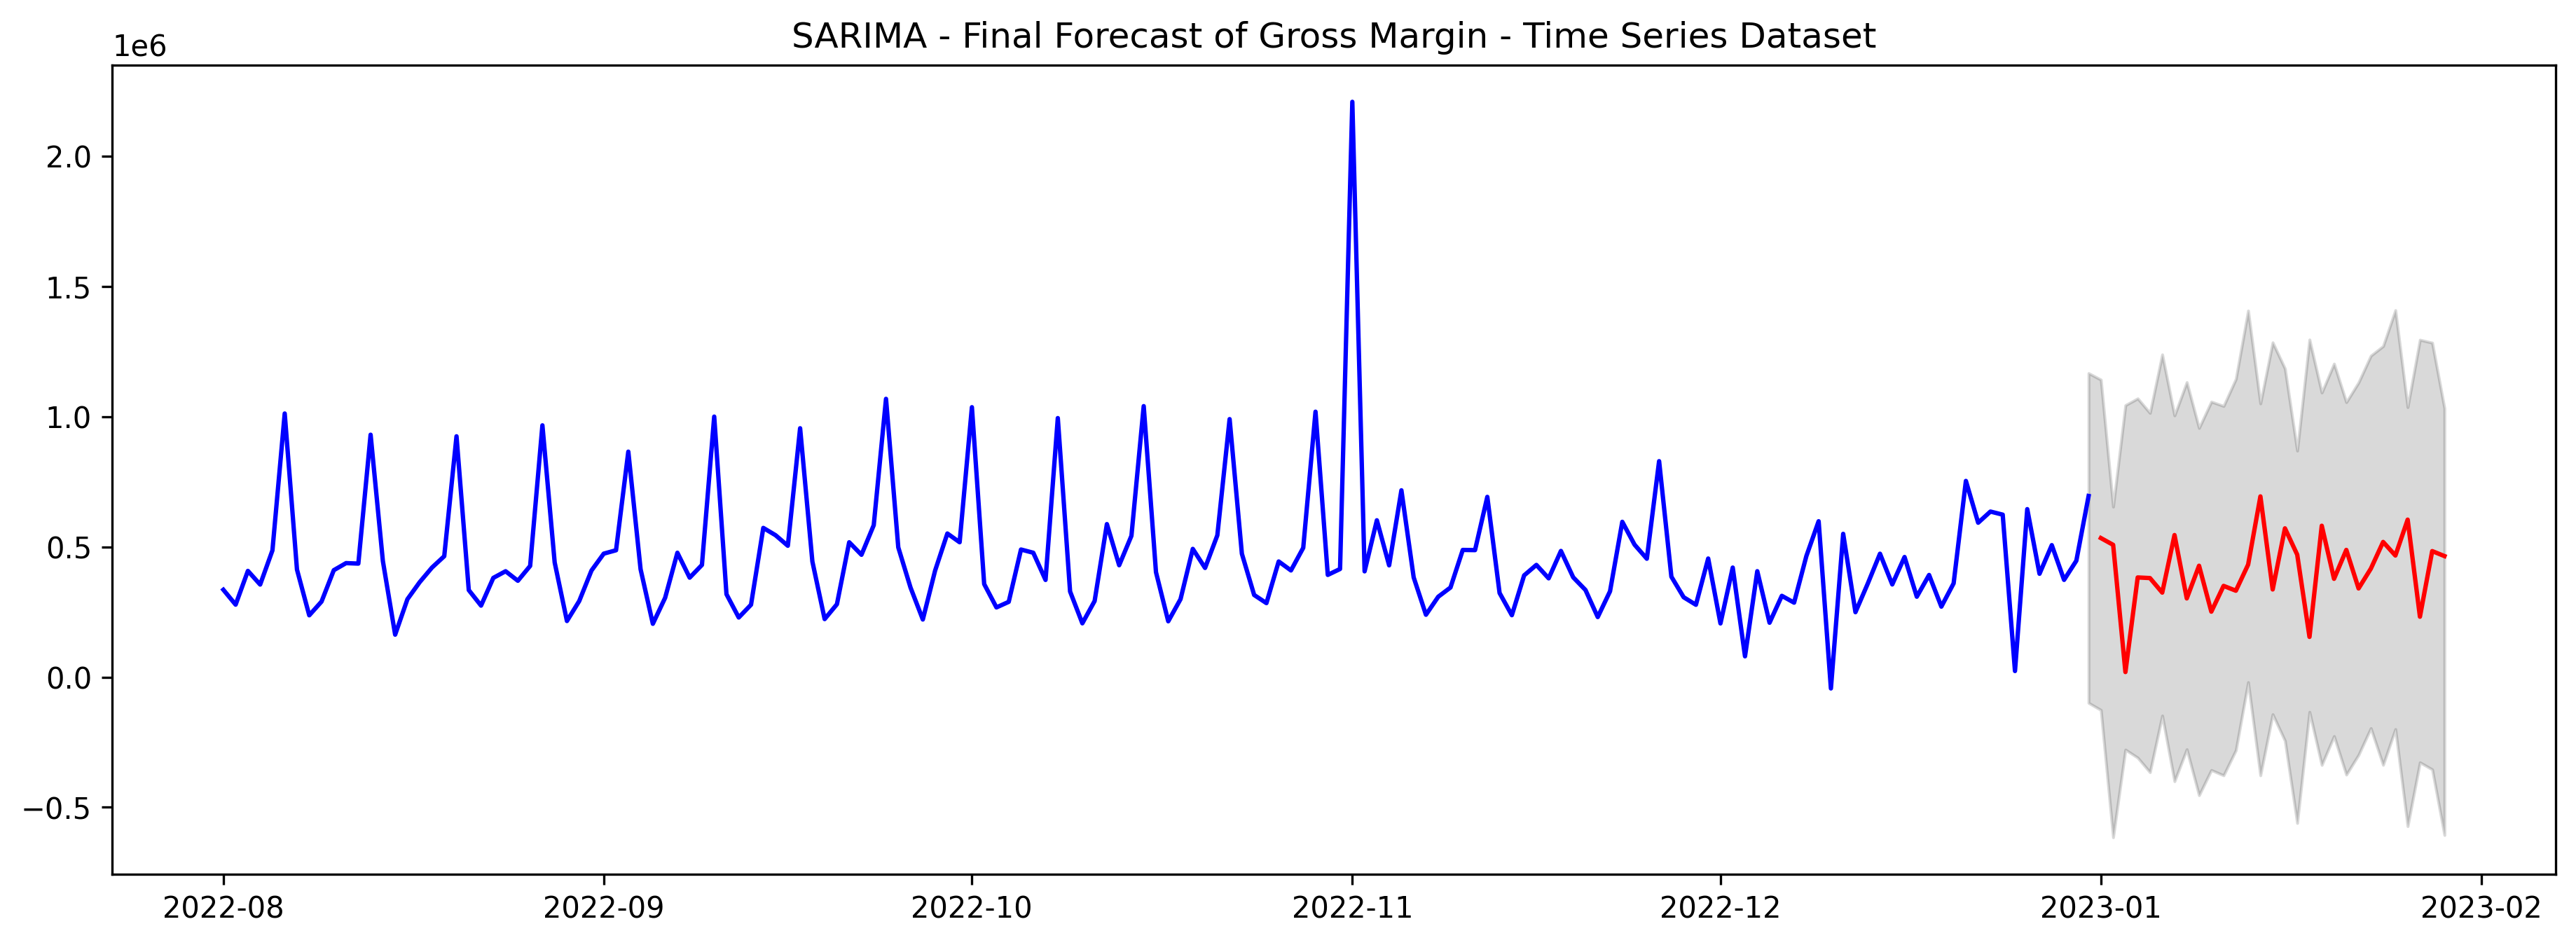

In [184]:
# Dự đoán
n_periods = 30
fitted_gm, confint_gm = model_gm.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc_gm = pd.date_range(data_gross_margin.index[-1], periods=n_periods, freq='D')

# Chuẩn bị series để vẽ biểu đồ
GM_fitted_series = pd.Series(fitted_gm, index=index_of_fc_gm)
lower_series_gm = pd.Series(confint_gm[:, 0], index=index_of_fc_gm)
upper_series_gm = pd.Series(confint_gm[:, 1], index=index_of_fc_gm)

# Lấy dữ liệu trong khoảng thời gian cần dự đoán
start_date_gm = '2022-08-01'
end_date_gm = '2022-12-31'
desired_data_gm = data_gross_margin.loc[start_date_gm:end_date_gm]

# Vẽ biểu đồ
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(desired_data_gm, color='blue', label='Actual')
plt.plot(GM_fitted_series, color='red', label='Forecast')
plt.fill_between(lower_series_gm.index,
                 lower_series_gm,
                 upper_series_gm,
                 color='k', alpha=.15)
plt.title("SARIMA - Final Forecast of Gross Margin - Time Series Dataset")
plt.show()

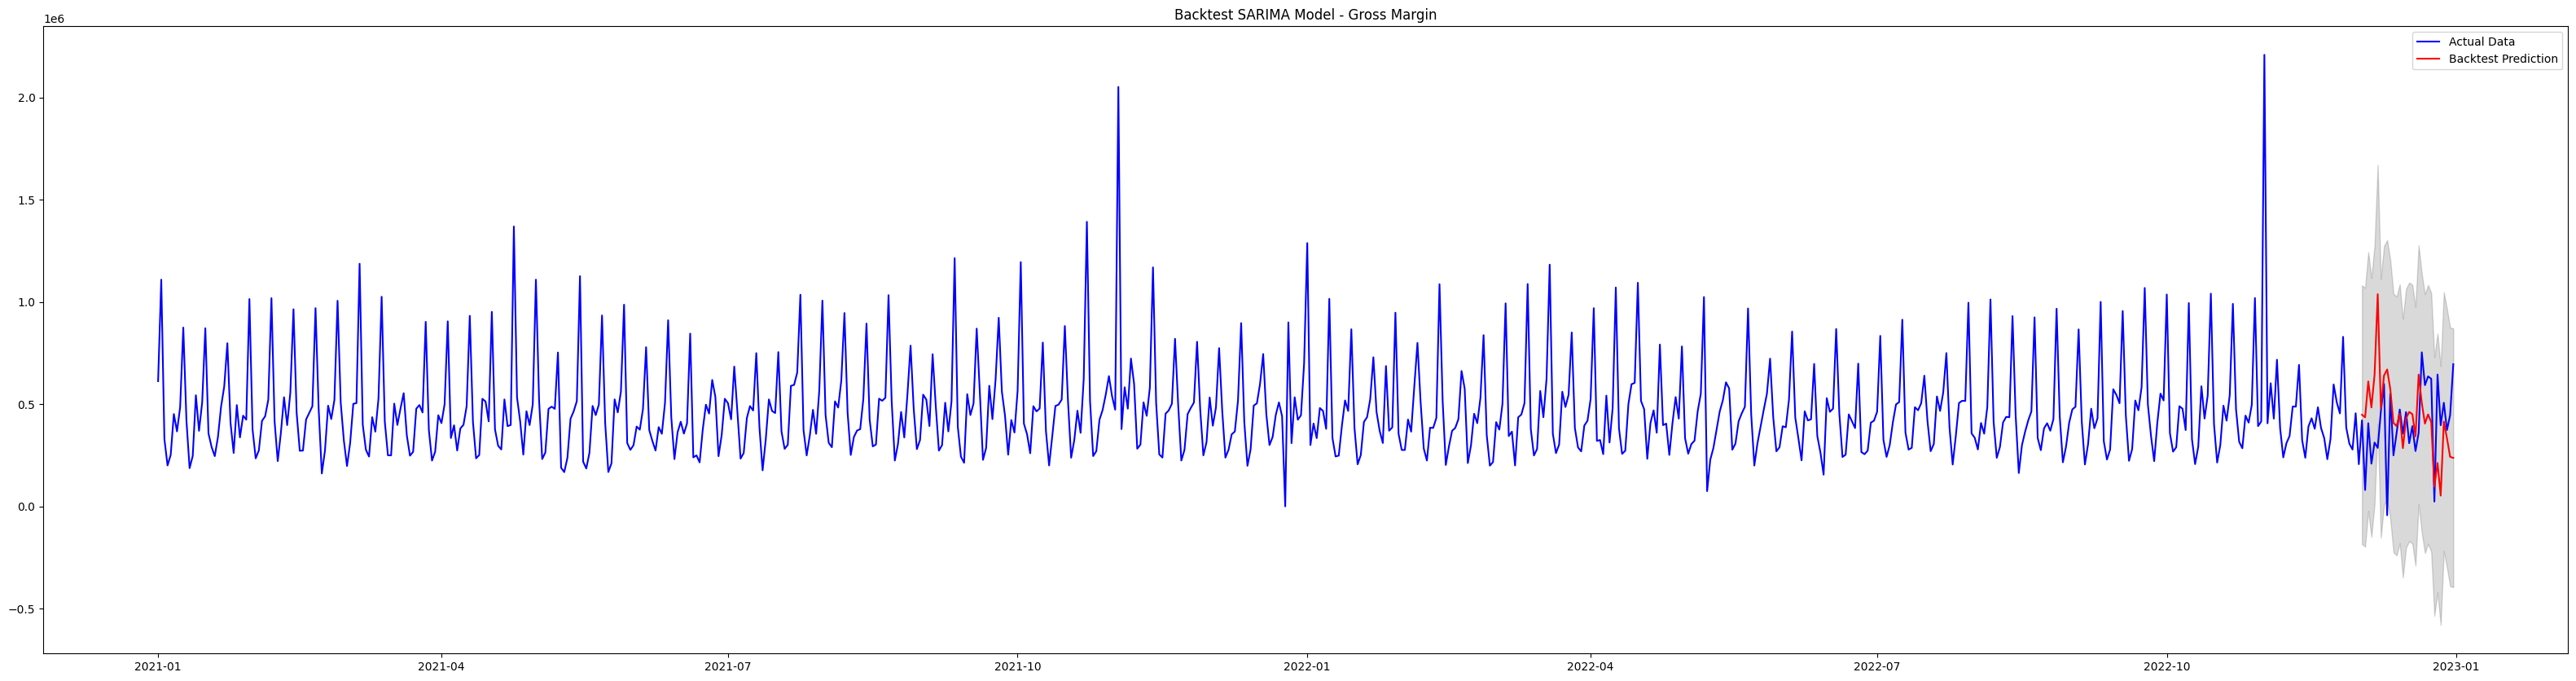

In [181]:
# Dự đoán lại với mô hình
backtest_start_date_gm = data_gross_margin.index[-30]
backtest_end_date_gm = data_gross_margin.index[-1]
backtest_predictions_gm, backtest_confint_gm = model_gm.predict_in_sample(start=backtest_start_date_gm, end=backtest_end_date_gm, return_conf_int=True)
backtest_index_gm = pd.date_range(start=backtest_start_date_gm, periods=len(backtest_predictions_gm), freq='D')
backtest_series_gm = pd.Series(backtest_predictions_gm, index=backtest_index_gm)
backtest_lower_series_gm = pd.Series(backtest_confint_gm[:, 0], index=backtest_index_gm)
backtest_upper_series_gm = pd.Series(backtest_confint_gm[:, 1], index=backtest_index_gm)

# Vẽ biểu đồ
plt.figure(figsize=(40, 10))
plt.plot(data_gross_margin, color='blue', label='Actual Data')
plt.plot(backtest_series_gm, color='red', label='Backtest Prediction')
plt.fill_between(backtest_lower_series_gm.index,
                 backtest_lower_series_gm,
                 backtest_upper_series_gm,
                 color='k', alpha=.15)
plt.title("Backtest SARIMA Model - Gross Margin")
plt.legend()
plt.show()


In [182]:
# Đánh giá mô hình
actual_data_gross_margin = data_gross_margin[backtest_start_date_gm:backtest_end_date_gm]
if len(backtest_series_gm) == len(actual_data_gross_margin):
    mae_gross_margin = mean_absolute_error(actual_data_gross_margin, backtest_series_gm)
    mse_gross_margin = mean_squared_error(actual_data_gross_margin, backtest_series_gm)
    rmse_gross_margin = np.sqrt(mse_gross_margin)
    r2_gross_margin = r2_score(actual_data_gross_margin, backtest_series_gm)

    # Tạo DataFrame để hiển thị các chỉ số đánh giá
    evaluation_df_gross_margin = pd.DataFrame({
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Value': [mae_gross_margin, mse_gross_margin, rmse_gross_margin, r2_gross_margin]
    })

    # Hiển thị DataFrame
    print(evaluation_df_gross_margin)
else:
    print("Dữ liệu thực tế và dữ liệu dự đoán không khớp. Vui lòng kiểm tra lại.")

  Metric         Value
0    MAE  2.034487e+05
1    MSE  7.759156e+10
2   RMSE  2.785526e+05
3     R2 -1.206163e+00


In [185]:
GM_fitted_series

2022-12-31              NaN
2023-01-01    533768.502783
2023-01-02    507712.436919
2023-01-03     19324.429149
2023-01-04    382531.318923
2023-01-05    380140.550729
2023-01-06    324359.459061
2023-01-07    545371.083472
2023-01-08    302022.784765
2023-01-09    427523.765861
2023-01-10    251168.361682
2023-01-11    350118.375672
2023-01-12    331621.352757
2023-01-13    431835.932222
2023-01-14    693699.507029
2023-01-15    336446.100307
2023-01-16    571094.612108
2023-01-17    470002.507037
2023-01-18    154296.845942
2023-01-19    581058.931749
2023-01-20    377276.939612
2023-01-21    488279.038930
2023-01-22    340310.453938
2023-01-23    416314.555662
2023-01-24    518838.799804
2023-01-25    466704.494260
2023-01-26    604517.127616
2023-01-27    231777.557430
2023-01-28    483683.049791
2023-01-29    464561.559710
Freq: D, dtype: float64

## 4 RESULT FORCATING TREND

In [187]:
df1 = TT_fitted_series.to_frame(name='NEW_TOTAL_TURNOVER')
df2 = DP_fitted_series.to_frame(name='NEW_DIVIDENDS_PAID')
df3 = GM_fitted_series.to_frame(name='NEW_GROSS_MARGIN')

# Merge them into a single DataFrame
merged_df = pd.concat([df1, df2, df3], axis=1)
merged_df

NEW_TOTAL_TURNOVER  NEW_DIVIDENDS_PAID  NEW_GROSS_MARGIN
2022-12-31                 NaN                 NaN               NaN
2023-01-01        4.079720e+06        2.939397e+06     533768.502783
2023-01-02        2.694706e+06        3.652344e+06     507712.436919
2023-01-03        3.260883e+06        1.992488e+06      19324.429149
2023-01-04        3.080653e+06        2.488459e+06     382531.318923
2023-01-05        2.600883e+06        3.501768e+06     380140.550729
2023-01-06        1.039980e+06        1.726049e+06     324359.459061
2023-01-07        6.752860e+06        3.216962e+06     545371.083472
2023-01-08        4.182987e+06        5.467207e+06     302022.784765
2023-01-09        2.606073e+06        2.943662e+06     427523.765861
2023-01-10        3.312809e+06        2.523937e+06     251168.361682
2023-01-11        2.998237e+06        2.031055e+06     350118.375672
2023-01-12        2.683025e+06        3.618267e+06     331621.352757
2023-01-13        3.239720e+06        2.338951e+06     431835.932222
2023-01-14        5.283318e+06        3.067850e+06     693699.507029
2023-01-15        4.617836e+06        5.549128e+06     336446.100307
2023-01-16        2.383801e+06        3.061634e+06     571094.612108
2023-01-17        3.192275e+06        2.538277e+06     470002.507037
2023-01-18        2.048910e+06        1.401937e+06     154296.845942
2023-01-19        2.891160e+06        3.005773e+06     581058.931749
2023-01-20        3.327866e+06        3.444935e+06     377276.939612
2023-01-21        5.129532e+06        3.025145e+06     488279.038930
2023-01-22        4.481336e+06        5.120287e+06     340310.453938
2023-01-23        2.298435e+06        2.535524e+06     416314.555662
2023-01-24        3.736849e+06        2.884980e+06     518838.799804
2023-01-25        3.439208e+06        2.022554e+06     466704.494260
2023-01-26        2.281949e+06        2.990924e+06     604517.127616
2023-01-27        3.543194e+06        3.356277e+06     231777.557430
2023-01-28        4.851553e+06        2.876133e+06     483683.049791
2023-01-29        4.189682e+06        4.472819e+06     464561.559710

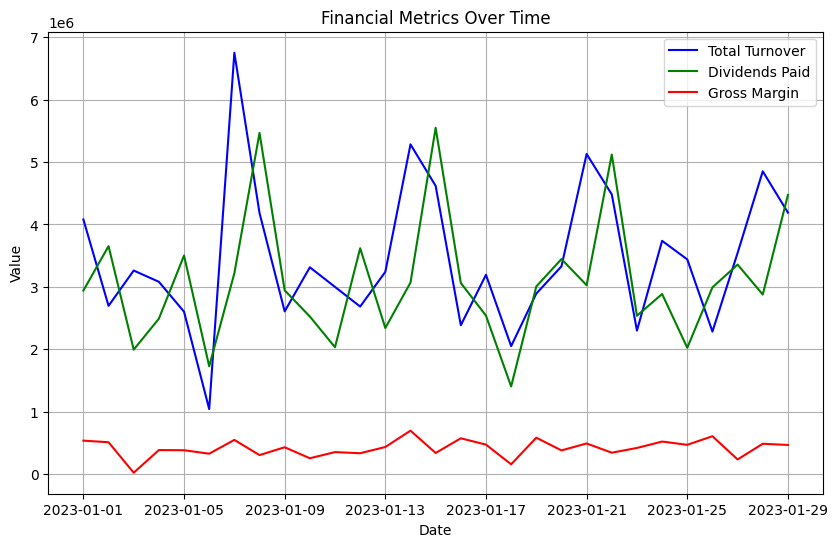

In [189]:
# Plotting
plt.figure(figsize=(10, 6))

plt.plot(merged_df.index, merged_df['NEW_TOTAL_TURNOVER'], label='Total Turnover', color='blue')
plt.plot(merged_df.index, merged_df['NEW_DIVIDENDS_PAID'], label='Dividends Paid', color='green')
plt.plot(merged_df.index, merged_df['NEW_GROSS_MARGIN'], label='Gross Margin', color='red')

plt.title('Financial Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)